In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

In [2]:
indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/osc_weights_new_muon.csv"
osc_weight_MC = pd.read_csv(indir_osc_weight_MC)
print(len(osc_weight_MC))
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])

38885781
          event_no  osc_weight
28956376  28956376         NaN


/tmp/ipykernel_44836/382299087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0


          event_no  osc_weight
28956376  28956376         0.0


In [3]:
indir_track_cascade_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/track_mu_Burnsample_RD_Full_db.csv"
indir_energy_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/energy_Burnsample_RD_Full_db.csv"
indir_zenith_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/zenith_Burnsample_RD_Full_db.csv"
indir_azimuth_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/azimuth_Burnsample_RD_Full_db.csv"
#indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/pid_Burnsample_RD_Full_db.csv"
indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"

indir_position_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/['position_x', 'position_y', 'position_z']_Burnsample_RD_Full_db.csv"

indir_track_cascade_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_multiclass_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
indir_position_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"


In [4]:
track_cascade_RD = pd.read_csv(indir_track_cascade_RD).sort_values('event_no').reset_index(drop = True)
energy_RD = pd.read_csv(indir_energy_RD).sort_values('event_no').reset_index(drop = True)
zenith_RD = pd.read_csv(indir_zenith_RD).sort_values('event_no').reset_index(drop = True)
azimuth_RD = pd.read_csv(indir_azimuth_RD).sort_values('event_no').reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).sort_values('event_no').reset_index(drop = True)
position_RD = pd.read_csv(indir_position_RD).sort_values('event_no').reset_index(drop = True)

track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
energy_MC = pd.read_csv(indir_energy_MC).sort_values('event_no').reset_index(drop = True)
zenith_MC = pd.read_csv(indir_zenith_MC).sort_values('event_no').reset_index(drop = True)
azimuth_MC = pd.read_csv(indir_azimuth_MC).sort_values('event_no').reset_index(drop = True)
multiclass_MC = pd.read_csv(indir_multiclass_MC).sort_values('event_no').reset_index(drop = True)
position_MC = pd.read_csv(indir_position_MC).sort_values('event_no').reset_index(drop = True)

In [5]:
print(np.shape(multiclass_RD))
print(np.shape(azimuth_RD))

(61739862, 6)
(61739862, 4)


In [6]:
print(np.shape(energy_MC))
print(np.shape(multiclass_MC))
print(np.shape(osc_weight_MC))
print(np.shape(track_cascade_MC))
print(np.shape(zenith_MC))
print(np.shape(azimuth_MC))
print(np.shape(position_MC))


(37235782, 4)
(37235782, 6)
(38885781, 2)
(37235782, 5)
(37235782, 4)
(37235782, 4)
(37235782, 8)


In [7]:
nr_electron_neutrino_i3_files = 602
nr_muon_neutrino_i3_files = 1518
nr_tau_neutrino_i3_files = 334
nr_muon_i3_files = 1093
nr_noise_i3_files = 401

nr_electron_neutrinos_total = 8118575 + 183333
nr_muon_neutrinos_total = 19923619 + 183333
nr_tau_neutrinos_total = 8702748 + 183333
nr_muon_total = 169737 + 550000
nr_noise_total = 321103 + 550000

nr_electron_neutrinos_test = 8118575
nr_muon_neutrinos_test = 19923619
nr_tau_neutrinos_test = 8702748
nr_muon_test = 169737
nr_noise_test =321103

electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

0.001698641060838674 0.0006648233149566109 0.0030570841456206404
878    1.375828e-07
890    2.086777e-07
904    1.883566e-07
916    2.064462e-07
930    1.458803e-07
932    1.216562e-07
938    3.205147e-07
945    2.292233e-07
946    2.398221e-07
956    1.527254e-07
Name: osc_weight, dtype: float64


/tmp/ipykernel_44836/3908699960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight


878    2.337037e-10
890    3.544685e-10
904    3.199503e-10
916    3.506780e-10
930    2.477983e-10
932    2.066502e-10
938    5.444394e-10
945    3.893682e-10
946    4.073716e-10
956    2.594257e-10
Name: osc_weight, dtype: float64


/tmp/ipykernel_44836/3908699960.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
/tmp/ipykernel_44836/3908699960.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
/tmp/ipykernel_44836/3908699960.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [8]:
track_cascade_MC = pd.merge(track_cascade_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
energy_MC = pd.merge(energy_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
zenith_MC = pd.merge(zenith_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
azimuth_MC = pd.merge(azimuth_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
multiclass_MC = pd.merge(multiclass_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
position_MC = pd.merge(position_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)


In [9]:
print(sum(multiclass_MC['pid'].isin((1,-1))))

321103


In [11]:
# nr_electron_neutrino_i3_files = 602
# nr_muon_neutrino_i3_files = 1518
# nr_tau_neutrino_i3_files = 334
# nr_muon_i3_files = 1093
# nr_noise_i3_files = 401

# nr_electron_neutrinos_total = 8118575 + 183333
# nr_muon_neutrinos_total = 19923619 + 183333
# nr_tau_neutrinos_total = 8702748 + 183333
# nr_muon_total = 169737 + 550000
# nr_noise_total = 321103 + 550000

# nr_electron_neutrinos_test = 8118575
# nr_muon_neutrinos_test = 19923619
# nr_tau_neutrinos_test = 8702748
# nr_muon_test = 169737
# nr_noise_test =321103

# electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
# muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
# tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
# muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
# noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
# print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

# electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
# muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
# tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
# muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
# noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
# neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

# print(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
# print(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

In [10]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)
track_cascade_RD['osc_weight'] = np.ones(len(track_cascade_RD))*Burnsample_weight
energy_RD['osc_weight'] = np.ones(len(energy_RD))*Burnsample_weight 
zenith_RD['osc_weight'] = np.ones(len(zenith_RD))*Burnsample_weight 
azimuth_RD['osc_weight'] = np.ones(len(azimuth_RD))*Burnsample_weight 
multiclass_RD['osc_weight'] = np.ones(len(multiclass_RD))*Burnsample_weight 
position_RD['osc_weight'] = np.ones(len(position_RD))*Burnsample_weight 

In [13]:

# print(np.argwhere(np.isnan(multiclass_MC['osc_weight'].to_list())))
# print(multiclass_MC['osc_weight'].to_list()[27726028])
# print(multiclass_MC['event_no'].to_list()[27726028])
# print(multiclass_MC[multiclass_MC['event_no']==28956376])


In [14]:
# multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))]

# fig,axs =  plt.subplots(figsize=(8, 4))
# counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],density=False,bins=100,alpha=0.5,label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
# axs.set_yscale('log')
# np.max(multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])

[0.53603812 0.34119532 0.25110275 0.20033974 0.167327   0.14761329
 0.13026732 0.11902647 0.1113945  0.10335963]
[0.43696082 0.28086587 0.20404713 0.16132833 0.13492197 0.1179346
 0.10436538 0.09534101 0.08892652 0.08308082]


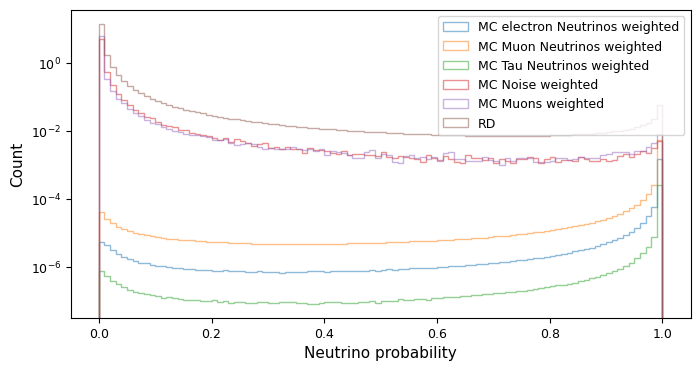

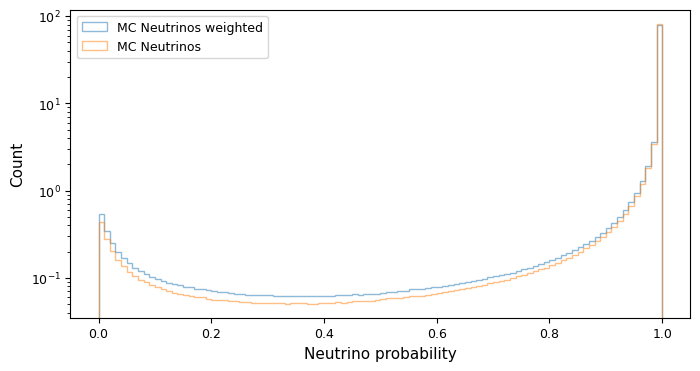

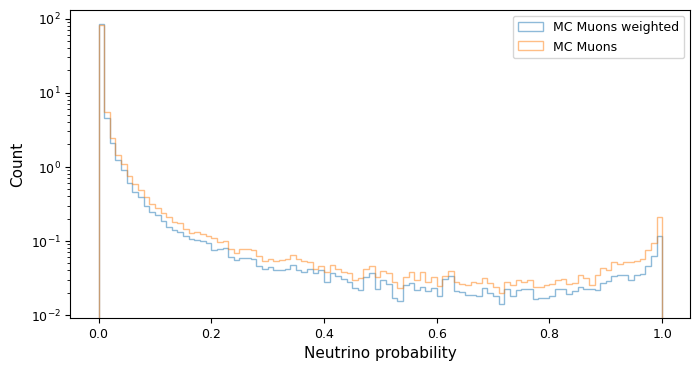

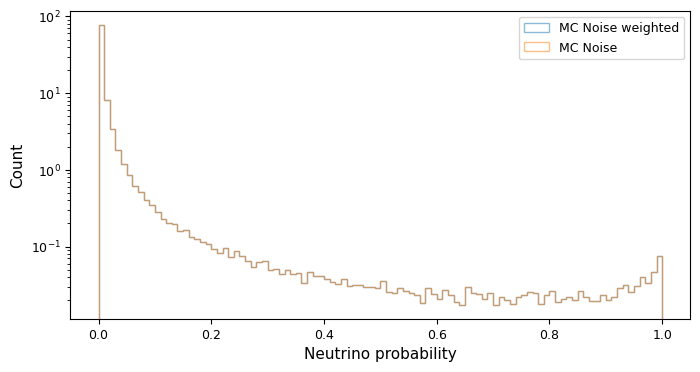

In [22]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12))],histtype='step',bins=bins_to_use,density=False,alpha=0.5,label='MC electron Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-14,14))],histtype='step',bins=bins_to_use,density=False,alpha=0.5,label='MC Muon Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-14,14))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-16,16))],histtype='step',bins=bins_to_use,density=False,alpha=0.5,label='MC Tau Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-16,16))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],histtype='step',bins=bins_to_use,density=False,alpha=0.5,label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],histtype='step',bins=bins_to_use,density=False,alpha=0.5,label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_test_weights, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],histtype='step',bins=bins_to_use,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()



bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],histtype='step',bins=bins_to_fit,density=True,alpha=0.5,label='MC Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_test, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],histtype='step',bins=bins_to_fit,density=True,alpha=0.5,label='MC Neutrinos')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()
print(counts_test_weights[:10])
print(counts_test[:10])

fig,axs =  plt.subplots(figsize=(8, 4))
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],histtype='step',bins=bins_to_fit,density=True,alpha=0.5,label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],histtype='step',bins=bins_to_fit,density=True,alpha=0.5,label='MC Muons')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig,axs =  plt.subplots(figsize=(8, 4))
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],histtype='step',bins=bins_to_fit,density=True,alpha=0.5,label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],histtype='step',bins=bins_to_fit,density=True,alpha=0.5,label='MC Noise')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

[1.92920991 2.80304995 3.48761662]
True


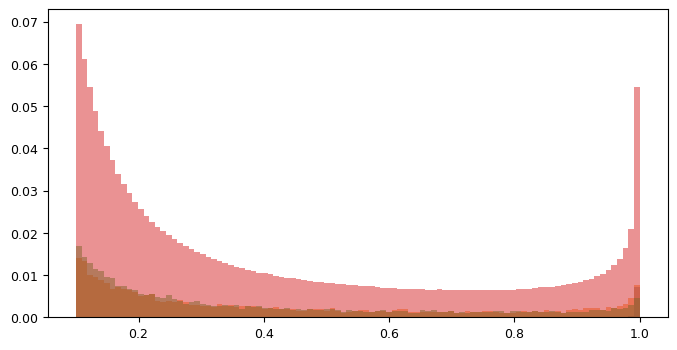

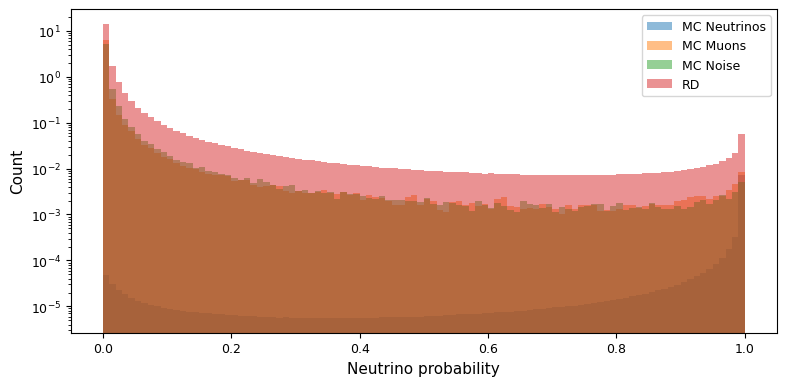

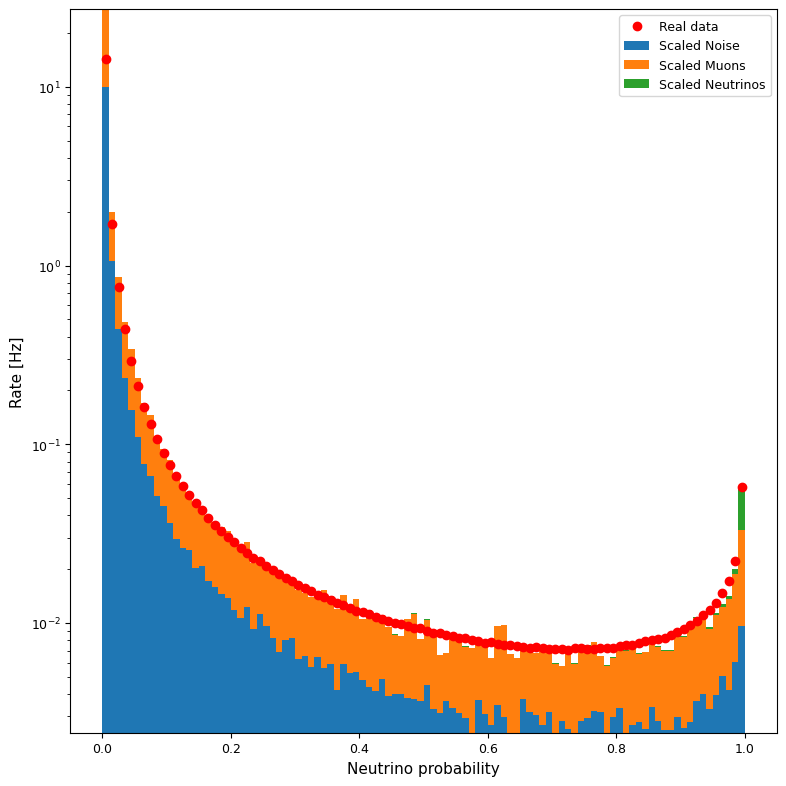

In [14]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0.1,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [1,1,1]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#


bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 8))


axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


axs.plot(bins_middle,counts_RD,'o',label='Data',color='red')
axs.set_xlabel('Neutrino probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [24]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/logit/Neutrino_prob_logit_MC.csv"
load_logit_MC = True
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)
    multiclass_MC['pid_neutrino_pred_logit'].to_csv(safe_load_place_MC)




safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
load_logit_RD = True
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)
    multiclass_RD['pid_neutrino_pred_logit'].to_csv(safe_load_place_RD)


In [ ]:
# troels_clean_neutrino_selection_MC = multiclass_MC['event_no'][multiclass_MC['pid_neutrino_pred_logit']>2]
# troels_clean_neutrino_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit']>2]

# troels_clean_neutrino_cascade_selection_MC = track_cascade_MC['event_no'][(track_cascade_MC['track_mu_pred'] < 0.75) & (track_cascade_MC['event_no'].isin(troels_clean_neutrino_selection_MC))]
# troels_clean_neutrino_cascade_selection_RD = track_cascade_RD['event_no'][(track_cascade_RD['track_mu_pred'] < 0.75) & (track_cascade_RD['event_no'].isin(troels_clean_neutrino_selection_RD))]

# print(len(troels_clean_neutrino_cascade_selection_MC))
# print(len(troels_clean_neutrino_cascade_selection_RD))
# print(troels_clean_neutrino_cascade_selection_MC.head(2))
# print(troels_clean_neutrino_cascade_selection_RD.head(2))

# troels_clean_neutrino_cascade_selection_MC = pd.DataFrame(troels_clean_neutrino_cascade_selection_MC)
# troels_clean_neutrino_cascade_selection_MC = pd.merge(troels_clean_neutrino_cascade_selection_MC.reset_index(drop=True),track_cascade_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_MC = pd.merge(troels_clean_neutrino_cascade_selection_MC.reset_index(drop=True),multiclass_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_MC = pd.merge(troels_clean_neutrino_cascade_selection_MC.reset_index(drop=True),energy_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_MC = pd.merge(troels_clean_neutrino_cascade_selection_MC.reset_index(drop=True),azimuth_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_MC = pd.merge(troels_clean_neutrino_cascade_selection_MC.reset_index(drop=True),zenith_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

# troels_clean_neutrino_cascade_selection_RD = pd.DataFrame(troels_clean_neutrino_cascade_selection_RD)
# troels_clean_neutrino_cascade_selection_RD = pd.merge(troels_clean_neutrino_cascade_selection_RD.reset_index(drop=True),track_cascade_RD.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_RD = pd.merge(troels_clean_neutrino_cascade_selection_RD.reset_index(drop=True),multiclass_RD.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_RD = pd.merge(troels_clean_neutrino_cascade_selection_RD.reset_index(drop=True),energy_RD.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_RD = pd.merge(troels_clean_neutrino_cascade_selection_RD.reset_index(drop=True),azimuth_RD.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# troels_clean_neutrino_cascade_selection_RD = pd.merge(troels_clean_neutrino_cascade_selection_RD.reset_index(drop=True),zenith_RD.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

# print(troels_clean_neutrino_cascade_selection_MC)

In [ ]:


# #print(troels_clean_neutrino_cascade_selection_MC.columns)
# troels_clean_neutrino_cascade_selection_MC_final = troels_clean_neutrino_cascade_selection_MC.drop(['Unnamed: 0_x', 'osc_weight_x','Unnamed: 0_y',
#        'Unnamed: 0_x',
#         'osc_weight_x', 'Unnamed: 0_y',
#        'energy_y', 'osc_weight_y',
#        'Unnamed: 0', 'energy',
#        'osc_weight'], axis=1)
# troels_clean_neutrino_cascade_selection_MC_final.rename(columns = {'energy_x':'energy'}, inplace = True)
# print(troels_clean_neutrino_cascade_selection_MC_final.tail(4))


# print(azimuth_MC[azimuth_MC['event_no']==68471292])
# print(multiclass_MC[multiclass_MC['event_no']==68471292])
# #print(troels_clean_neutrino_cascade_selection_RD.columns)
# # print(troels_clean_neutrino_cascade_selection_RD.drop(['Unnamed: 0_x', 'osc_weight_x','Unnamed: 0_y',
# #        'pid',  'pid_neutrino_pred_logit', 'Unnamed: 0_x',
# #         'osc_weight_x', 'Unnamed: 0_y',
# #        'energy_y', 'osc_weight_y',
# #        'Unnamed: 0', 'energy',
# #        'osc_weight'], axis=1))

In [ ]:
# print(troels_clean_neutrino_cascade_selection_RD.columns)
# troels_clean_neutrino_cascade_selection_RD_final = troels_clean_neutrino_cascade_selection_RD.drop([ 'Unnamed: 0_x', 'osc_weight_x',
#        'Unnamed: 0_y','pid'
#        , 'osc_weight_y', 'Unnamed: 0_x', 'osc_weight_x', 'Unnamed: 0_y', 'osc_weight_y', 'Unnamed: 0','osc_weight'], axis=1)
# print(troels_clean_neutrino_cascade_selection_RD_final.head(3))
# print(azimuth_RD[azimuth_RD['event_no']==7])
# print(multiclass_RD[multiclass_RD['event_no']==7])

In [ ]:
# Troels_save_place = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/Troels_cascade_events/"
# troels_clean_neutrino_cascade_selection_MC_final.to_csv(Troels_save_place+'clean_cascade_events_MC.csv')
# troels_clean_neutrino_cascade_selection_RD_final.to_csv(Troels_save_place+'clean_cascade_events_RD.csv')

[2.18794587 1.60146816 2.79392153]
True


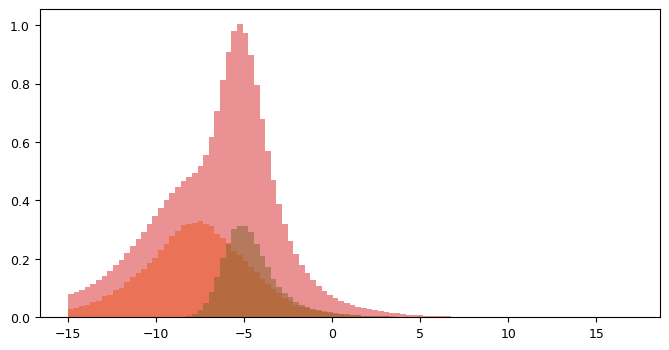

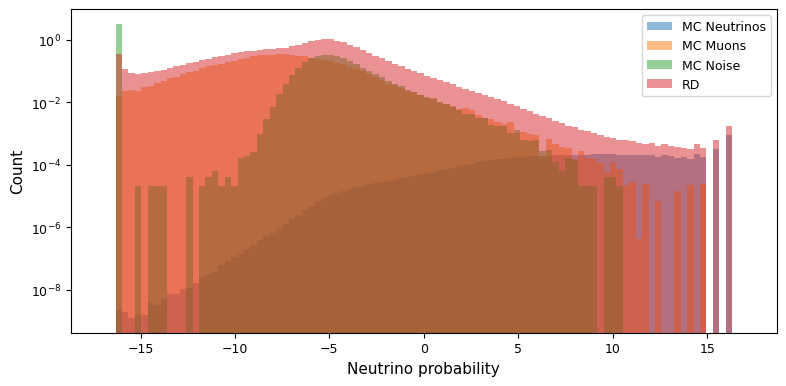

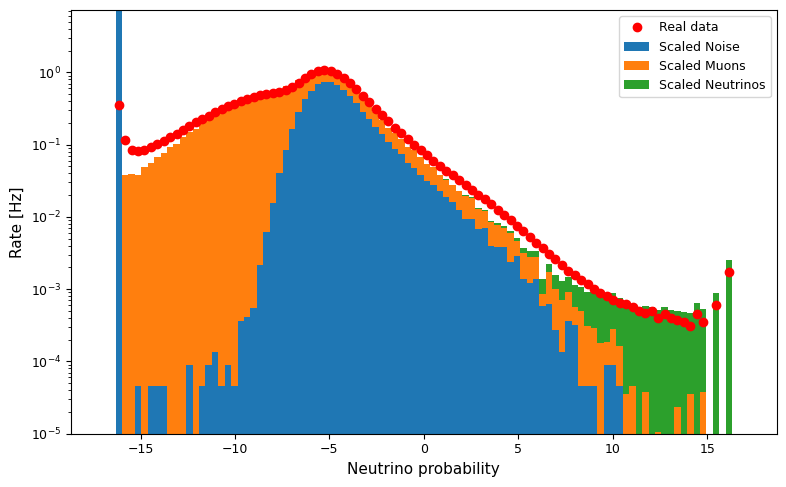

In [25]:
bins_to_use = np.linspace(-17,17,101)
bins_to_fit = np.linspace(-15,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'])

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if counts_RD_fit[i] != 0:
            sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


axs.plot(bins_middle,counts_RD,'o',label='Data',color='red')
axs.set_xlabel('Neutrino probability')
axs.set_ylim(bottom=10**-5)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [26]:
Neutrino_cut = 12
pure_neutrino_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit'] > Neutrino_cut]
pure_neutrino_selection_MC_noise_and_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-13,13,-1,1)))]
pure_neutrino_selection_MC = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
#pure_neutrino_selection_MC_with_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16,-1,1,-13,13)))]
print('There are this many muons and noise selected away:',len(pure_neutrino_selection_MC_noise_and_muons))
print(multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())].value_counts())

There are this many muons and noise selected away: 4
 14.0    4529302
 16.0    2345916
 12.0    2026974
-14.0    1988173
-12.0     896529
-16.0     882725
Name: pid, dtype: int64


In [27]:
print('this is the rate of muons surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC_noise_and_muons.to_list())]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())]))
print(len(pure_neutrino_selection_MC))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_neutrino_selection_RD.to_list())]))
print(len(pure_neutrino_selection_RD))

this is the rate of muons surviving 6.682139306877526e-05
0.002825976038016856
12669619
0.00577558948025145
18226


In [28]:
print('this many pure neutrinos RD',len(pure_neutrino_selection_RD))
print('this many pure neutrinos MC',len(pure_neutrino_selection_MC))
track_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==1]
cascade_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==0]

pure_neutrino_track_selection = track_event_no[track_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)

pure_neutrino_cascade_selection = cascade_event_no[cascade_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)
#print(track_event_no)
#print(cascade_event_no)

this many pure neutrinos RD 18226
this many pure neutrinos MC 12669619


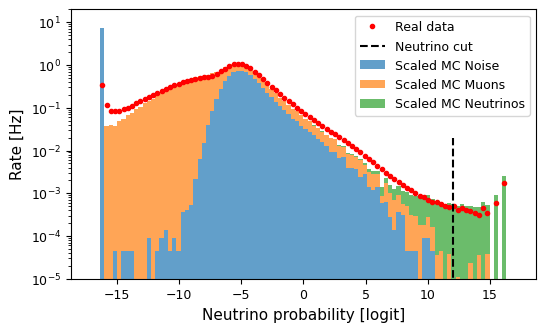

In [48]:
fig, ax1 = plt.subplots(figsize=set_size('thesis'))
bins_to_use = np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

ax1.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled MC Noise',alpha=0.7)
ax1.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled MC Muons',alpha=0.7)
ax1.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled MC Neutrinos',alpha=0.7)
ax1.plot(bins_middle,counts_RD,'.',label='Data',color='red')
ax1.vlines(Neutrino_cut,0,0.02,color='black',label='Neutrino cut',linestyles='dashed')
ax1.set_xlabel('Neutrino probability [logit]')
ax1.set_ylim(top=20,bottom=10**(-5))
ax1.set_ylabel('Rate [Hz]')
ax1.set_yscale('log')

ax1.legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'multiclass_neutrino_prob.png',bbox_inches='tight')

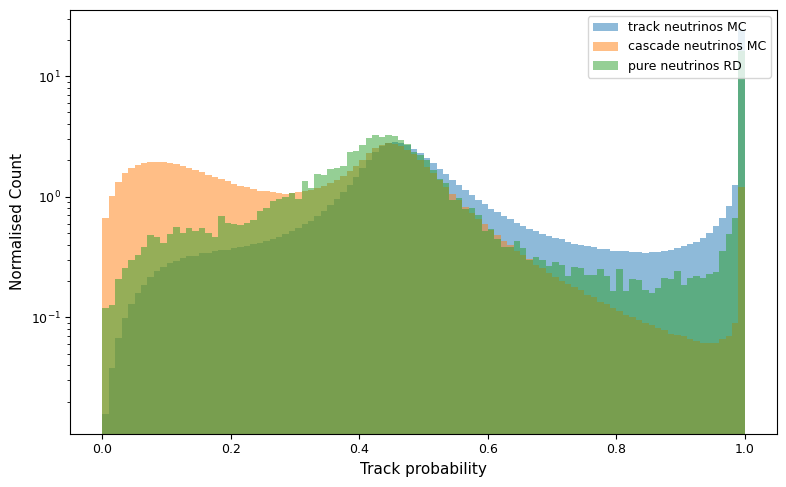

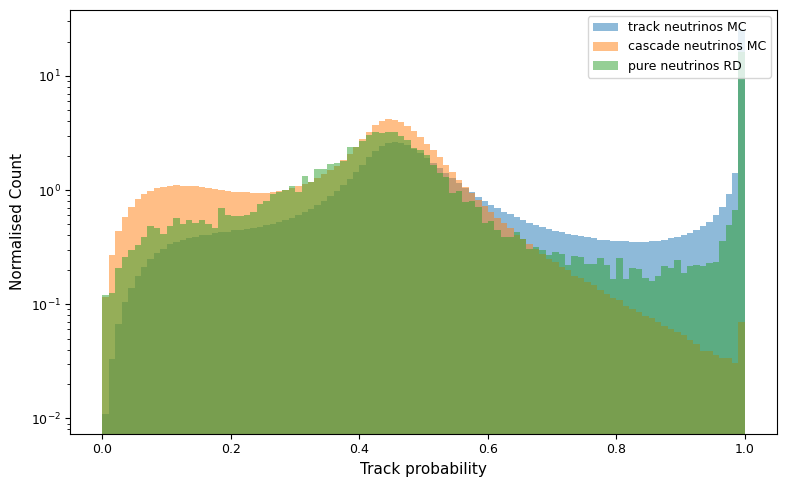

In [30]:
fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,101)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='track neutrinos MC',alpha=0.5)#,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5)#,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5)#,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,101)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

[1.32881018 2.95591915]
True


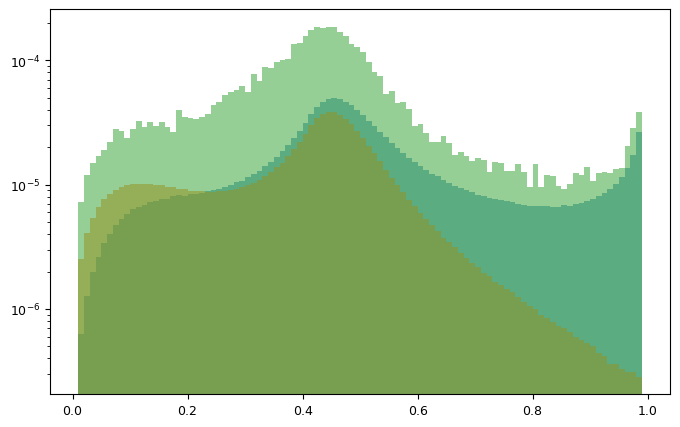

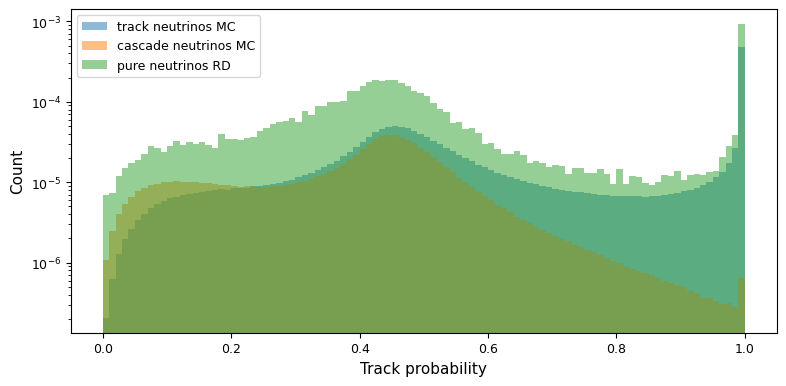

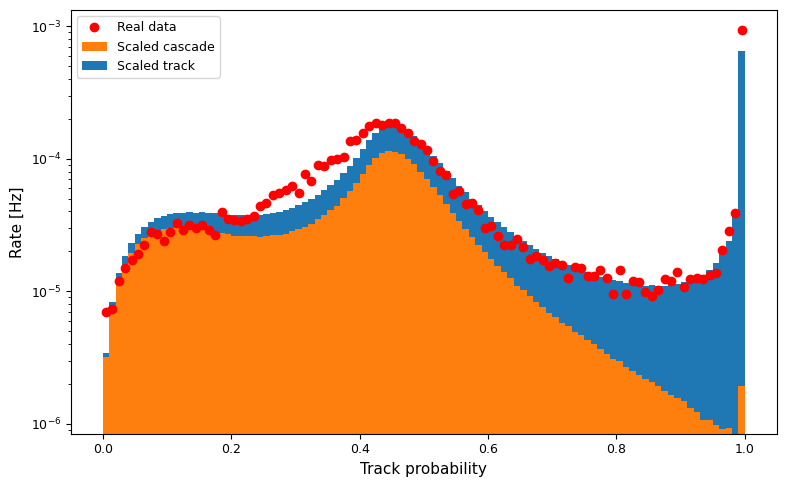

In [31]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0.01,0.99,99)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

fig, axs = plt.subplots(figsize=(8, 5))

counts_track_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_fit,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_fit,label='cascade neutrinos MC',alpha=0.5,weights = track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
counts_RD_fit, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_fit,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_yscale('log')

fig, axs = plt.subplots(figsize=(8, 4))


counts_track, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_use,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
counts_RD_multiclass, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        sum+= (counts_RD_fit[i] - N_scalers[0]*counts_track_fit[i] - N_scalers[1]*counts_cascade_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [50,50]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None), (0, None)))
print(res.x)
print(res.success)

counts_track_plot = counts_track*res.x[0]#
counts_cascade_plot = counts_cascade*res.x[1]##

bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1')
axs.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0')


axs.plot(bins_middle,counts_RD_multiclass,'o',label='Data',color='red')
axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()


In [49]:
track_cut = 0.9
cascade_cut = 0.5
pure_track_event_no_MC = track_cascade_MC['event_no'][(track_cascade_MC['track_mu_pred']>track_cut)]# & (track_cascade_MC['track_mu_pred'] < track_cut_2) ]
pure_track_event_no_RD = track_cascade_RD['event_no'][(track_cascade_RD['track_mu_pred']>track_cut)]# & (track_cascade_RD['track_mu_pred'] < track_cut_2)]


pure_cascade_event_no_MC = track_cascade_MC['event_no'][track_cascade_MC['track_mu_pred']<cascade_cut]
pure_cascade_event_no_RD = track_cascade_RD['event_no'][track_cascade_RD['track_mu_pred']<cascade_cut]


pure_track_selection_MC = pure_track_event_no_MC[pure_track_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_track_selection_RD = pure_track_event_no_RD[pure_track_event_no_RD.isin(pure_neutrino_selection_RD)]


pure_cascade_selection_MC = pure_cascade_event_no_MC[pure_cascade_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_cascade_selection_RD = pure_cascade_event_no_RD[pure_cascade_event_no_RD.isin(pure_neutrino_selection_RD)]

print(len(pure_track_selection_MC))
print(len(pure_track_selection_RD))
print(len(pure_cascade_selection_MC))
print(len(pure_cascade_selection_RD))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_track_selection_MC.to_list())]))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_track_selection_RD.to_list())]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC.to_list())]))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD.to_list())]))

1872299
3459
8039145
11256
0.000602656436968332
0.0010961134649506072
0.0015333836788180098
0.003566884406326694


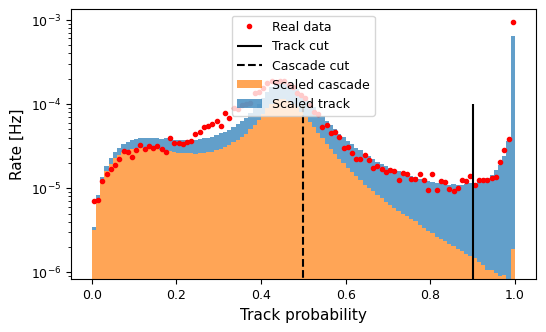

In [33]:
fig, ax2 = plt.subplots(figsize=set_size('thesis'))
bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

ax2.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1',alpha=0.7)
ax2.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0',alpha=0.7)
ax2.plot(bins_middle,counts_RD_multiclass,'.',label='Data',color='red')
ax2.vlines(track_cut,0,10**-4,color='black',label='Track cut')
ax2.vlines(cascade_cut,0,10**-4,color='black',linestyle='dashed',label='Cascade cut')
ax2.set_xlabel('Track probability')
ax2.set_ylabel('Rate [Hz]')
ax2.set_yscale('log')
ax2.legend(loc='upper center')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'track_probability.png',bbox_inches='tight')

In [31]:
# print(len(pure_track_selection_MC))
# print(len(pure_track_selection_RD))

# fig, axs = plt.subplots(figsize=(8, 8))

# axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)])
# axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_track_selection_RD)])

# axs.set_xlabel('Neutrino probability')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Count')
# axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()


In [34]:
with_MC_truth = True

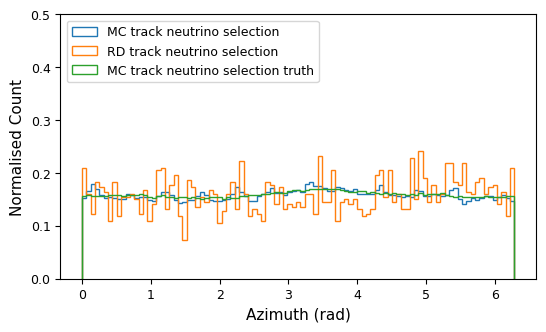

In [35]:

fig, ax3 = plt.subplots(figsize=set_size('thesis'))

bins=np.linspace(0,np.pi*2,100)
ax3.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax3.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.set_xlabel('Azimuth (rad)')
ax3.set_ylabel('Normalised Count')
ax3.set_ylim(top=0.5)
ax3.legend(loc='upper left')
fig.tight_layout()

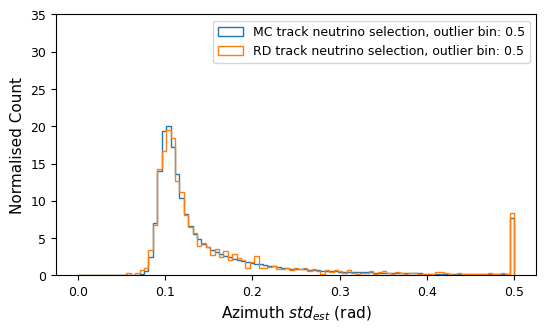

In [36]:

fig, ax5 = plt.subplots(figsize=set_size('thesis'))
bins=np.linspace(0,0.5,100)
ax5.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax5.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
ax5.set_xlabel(r'Azimuth $std_{est}$ (rad)')
ax5.set_ylim(top=35)
ax5.set_ylabel('Normalised Count')
ax5.legend(loc='upper right')
fig.tight_layout()

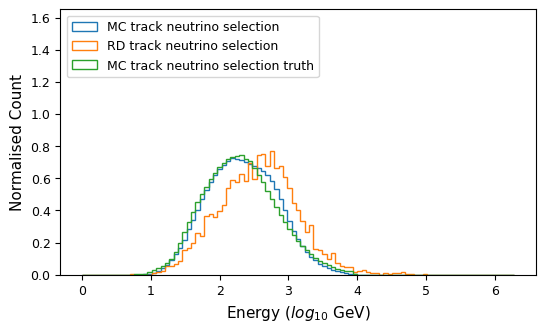

In [37]:
bins=np.linspace(0,np.pi*2,100)
fig, ax7 = plt.subplots(figsize=set_size('thesis'))

bins=np.linspace(0,np.pi*2,100)
ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.set_ylim(top=1.65)
ax7.set_xlabel(r'Energy ($log_{10}$ GeV)')
ax7.set_ylabel('Normalised Count')
ax7.legend(loc='upper left')
fig.tight_layout()

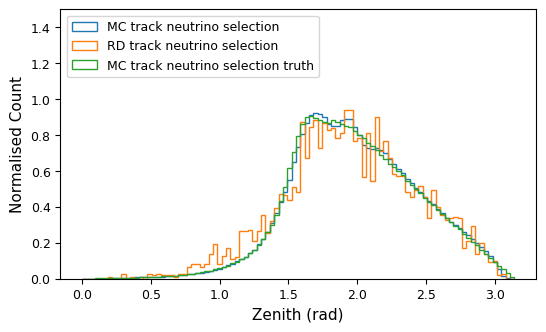

In [38]:

fig, ax9 = plt.subplots(figsize=set_size('thesis'))
bins=np.linspace(0,np.pi,100)
ax9.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax9.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.set_xlabel('Zenith (rad)')
ax9.set_ylim(top=1.5)
ax9.set_ylabel('Normalised Count')
ax9.legend(loc='upper left')
fig.tight_layout()

# bins=np.linspace(0,np.pi,100)
# fig, axs = plt.subplots(figsize=(8, 5))

# axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# #axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD track neutrino selection',bins=bins,alpha=0.5)

# axs.set_xlabel('Zenith')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Normalised Count')
# #axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()


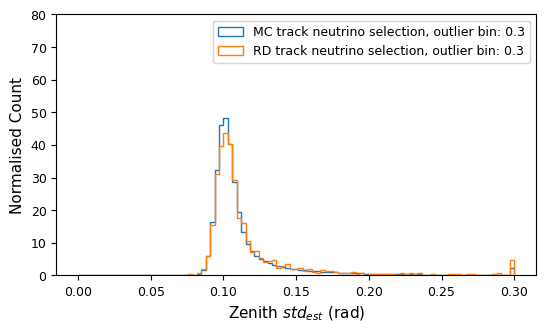

In [39]:

fig, ax11 = plt.subplots(figsize=set_size('thesis'))
bins=np.linspace(0,0.3,100)
ax11.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax11.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
ax11.set_xlabel(r'Zenith $std_{est}$ (rad)')
ax11.set_ylabel('Normalised Count')
ax11.set_ylim(top=80)
ax11.legend(loc='upper right')
fig.tight_layout()

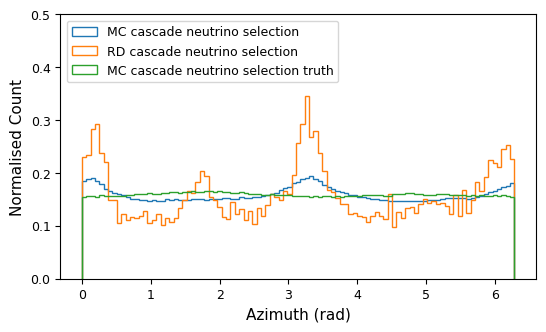

In [40]:

fig, ax4 = plt.subplots(figsize=set_size('thesis'))

bins=np.linspace(0,np.pi*2,100)
ax4.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax4.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.set_xlabel('Azimuth (rad)')
ax4.set_ylabel('Normalised Count')
ax4.set_ylim(top=0.5)
ax4.legend(loc='upper left')
fig.tight_layout()

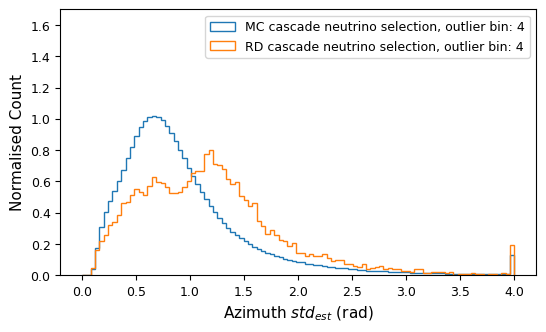

In [41]:

fig, ax6 = plt.subplots(figsize=set_size('thesis'))

bins=np.linspace(0,4,100)
ax6.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax6.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
ax6.set_xlabel(r'Azimuth $std_{est}$ (rad)')
ax6.set_ylim(top=1.7)
ax6.set_ylabel('Normalised Count')
ax6.legend(loc='upper right')
fig.tight_layout()

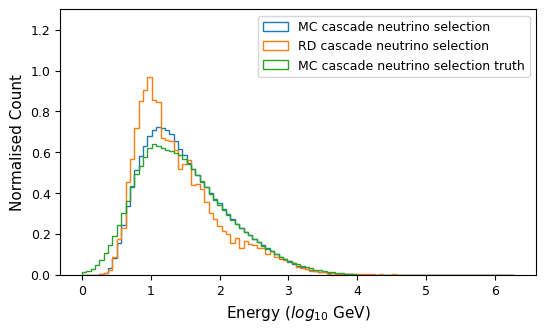

In [42]:

fig, ax8 = plt.subplots(figsize=set_size('thesis'))

bins=np.linspace(0,np.pi*2,100)
ax8.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax8.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.set_ylim(top=1.3)
ax8.set_xlabel(r'Energy ($log_{10}$ GeV)')
ax8.set_ylabel('Normalised Count')
ax8.legend(loc='upper right')
fig.tight_layout()

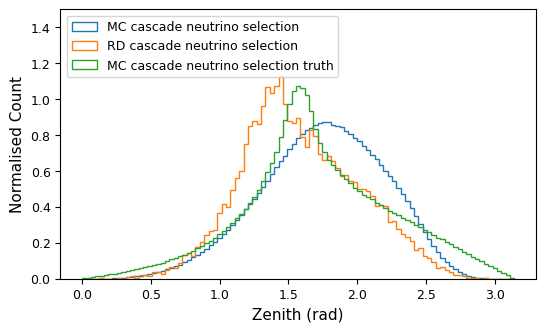

In [43]:
bins=np.linspace(0,np.pi,100)
fig, ax10 = plt.subplots(figsize=set_size('thesis'))
bins=np.linspace(0,np.pi,100)
ax10.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax10.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.set_ylim(top=1.5)
ax10.set_xlabel('Zenith (rad)')
ax10.set_ylabel('Normalised Count')
ax10.legend(loc='upper left')
fig.tight_layout()

# bins=np.linspace(0,np.pi,100)
# fig, axs = plt.subplots(figsize=(8, 5))

# axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=False,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# #axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=False,label='MC cascade neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,label='RD cascade neutrino selection',bins=bins,alpha=0.5)

# axs.set_xlabel('Zenith')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Normalised Count')
# #axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()

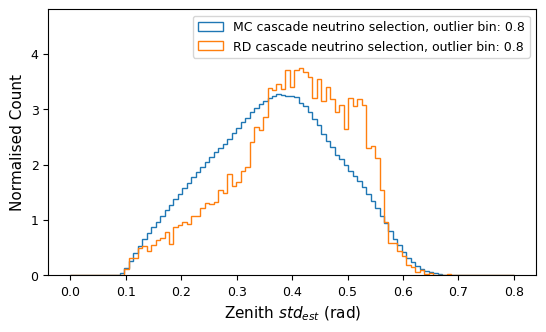

In [44]:

fig, ax12 = plt.subplots(figsize=set_size('thesis'))
bins=np.linspace(0,0.8,100)
ax12.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax12.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
ax12.set_xlabel(r'Zenith $std_{est}$ (rad)')
ax12.set_ylim(top=4.8)
ax12.set_ylabel('Normalised Count')
ax12.legend(loc='upper right')
fig.tight_layout()

In [45]:
from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

In [46]:

print(pure_track_selection_MC.head(10).to_list())
print(pure_track_selection_RD.head(10).to_list())

[712.0, 33465.0, 33514.0, 33977.0, 34022.0, 35624.0, 36312.0, 36544.0, 36627.0, 36771.0]
[158374.0, 161333.0, 190659.0, 224012.0, 257306.0, 269635.0, 270732.0, 281585.0, 513060.0, 546451.0]


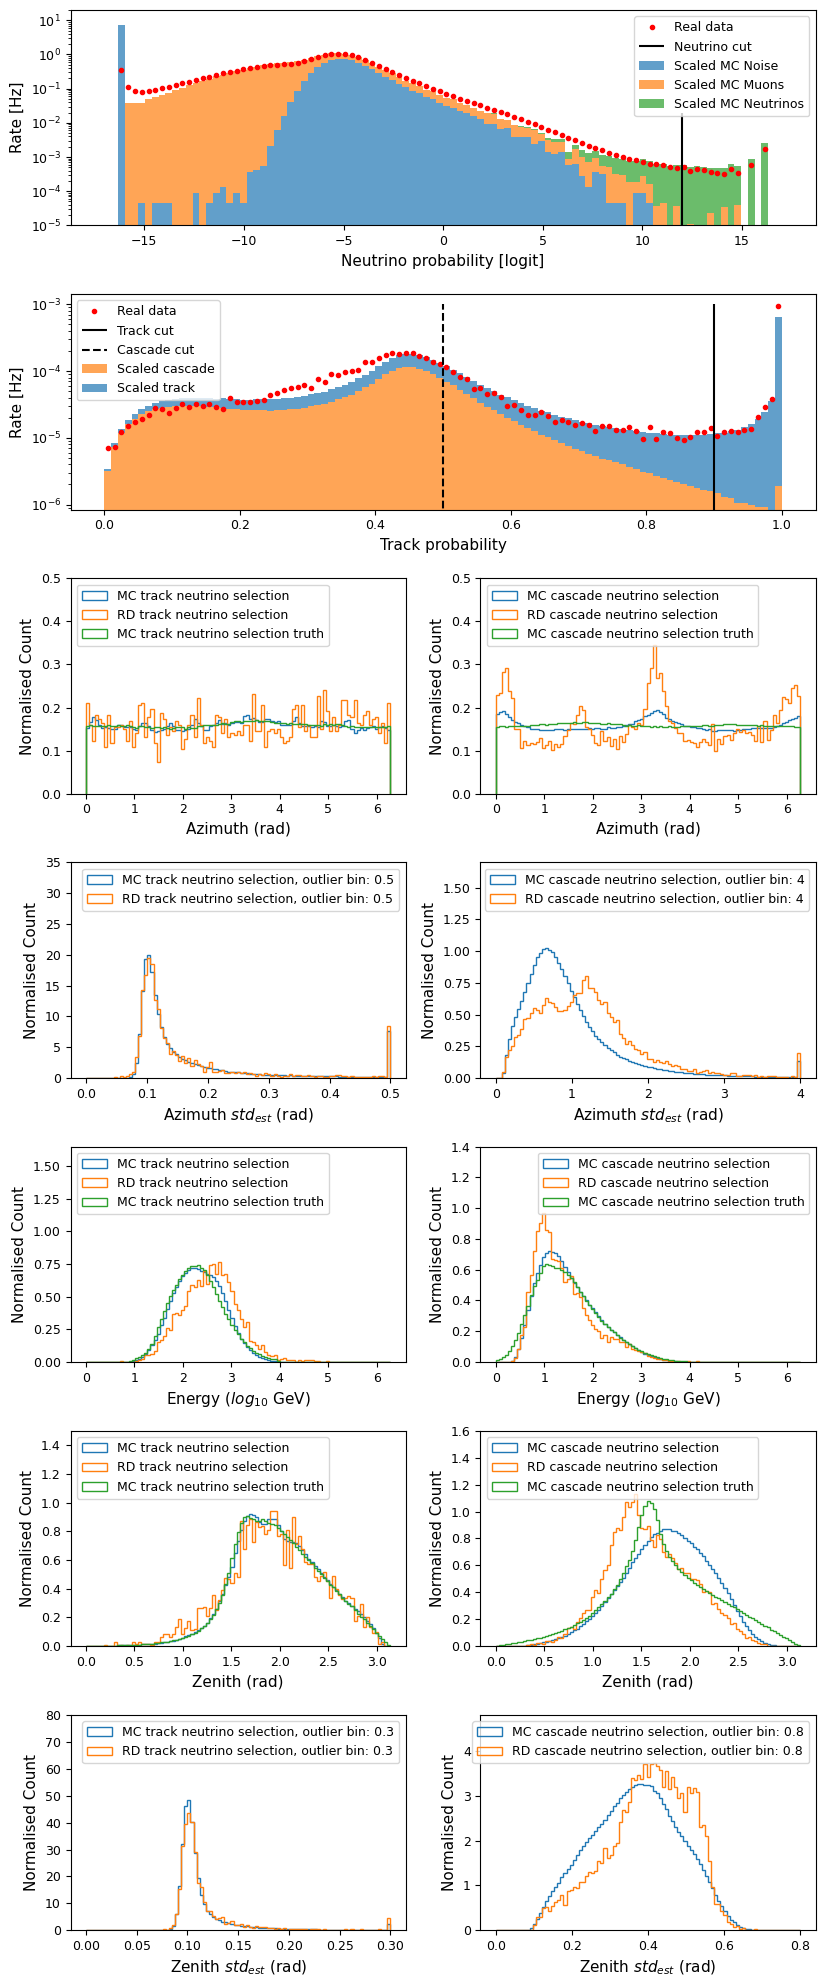

In [50]:
with_MC_truth = True


bins_to_use = np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

fig = plt.figure(figsize=set_size('thesis',subplots=(7,2),fraction=1.5,y_size=20))
ax1 = plt.subplot2grid(shape=(7,2), loc=(0,0), colspan=2, fig=fig)
ax1.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled MC Noise',alpha=0.7)
ax1.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled MC Muons',alpha=0.7)
ax1.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled MC Neutrinos',alpha=0.7)
ax1.plot(bins_middle,counts_RD,'.',label='Data',color='red')
ax1.vlines(Neutrino_cut,0,0.02,color='black',label='Neutrino cut')
ax1.set_xlabel('Neutrino probability [logit]')
ax1.set_ylim(top=20,bottom=10**(-5))
ax1.set_ylabel('Rate [Hz]')
ax1.set_yscale('log')
ax1.legend(loc='upper right')


bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]
ax2 = plt.subplot2grid((7,2), (1,0), colspan=2)
ax2.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1',alpha=0.7)
ax2.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0',alpha=0.7)
ax2.plot(bins_middle,counts_RD_multiclass,'.',label='Data',color='red')
ax2.vlines(track_cut,0,10**-3,color='black',label='Track cut')
ax2.vlines(cascade_cut,0,10**-3,color='black',linestyle='dashed',label='Cascade cut')
ax2.set_xlabel('Track probability')
ax2.set_ylabel('Rate [Hz]')
ax2.set_yscale('log')
ax2.legend(loc='upper left')

bins=np.linspace(0,np.pi*2,100)
ax3 = plt.subplot2grid((7,2), (2,0), colspan=1)
ax3.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax3.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.set_xlabel('Azimuth (rad)')
ax3.set_ylabel('Normalised Count')
ax3.set_ylim(top=0.5)
ax3.legend(loc='upper left')

ax4 = plt.subplot2grid((7,2), (2,1), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax4.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax4.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.set_xlabel('Azimuth (rad)')
ax4.set_ylabel('Normalised Count')
ax4.set_ylim(top=0.5)
ax4.legend(loc='upper left')

ax5 = plt.subplot2grid((7,2), (3,0), colspan=1)
bins=np.linspace(0,0.5,100)
ax5.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax5.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
ax5.set_xlabel(r'Azimuth $std_{est}$ (rad)')
ax5.set_ylim(top=35)
ax5.set_ylabel('Normalised Count')
ax5.legend(loc='upper right')


ax6 = plt.subplot2grid((7,2), (3,1), colspan=1)
bins=np.linspace(0,4,100)
ax6.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax6.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
ax6.set_xlabel(r'Azimuth $std_{est}$ (rad)')
ax6.set_ylim(top=1.7)
ax6.set_ylabel('Normalised Count')
ax6.legend(loc='upper right')

ax7 = plt.subplot2grid((7,2), (4,0), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.set_ylim(top=1.65)
ax7.set_xlabel(r'Energy ($log_{10}$ GeV)')
ax7.set_ylabel('Normalised Count')
ax7.legend(loc='upper left')


ax8 = plt.subplot2grid((7,2), (4,1), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax8.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax8.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.set_ylim(top=1.4)
ax8.set_xlabel(r'Energy ($log_{10}$ GeV)')
ax8.set_ylabel('Normalised Count')
ax8.legend(loc='upper right')



ax9 = plt.subplot2grid((7,2), (5,0), colspan=1)
bins=np.linspace(0,np.pi,100)
ax9.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax9.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.set_xlabel('Zenith (rad)')
ax9.set_ylim(top=1.5)
ax9.set_ylabel('Normalised Count')
ax9.legend(loc='upper left')



ax10 = plt.subplot2grid((7,2), (5,1), colspan=1)
bins=np.linspace(0,np.pi,100)
ax10.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax10.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.set_ylim(top=1.6)
ax10.set_xlabel('Zenith (rad)')
ax10.set_ylabel('Normalised Count')
ax10.legend(loc='upper left')


ax11 = plt.subplot2grid((7,2), (6,0), colspan=1)
bins=np.linspace(0,0.3,100)
ax11.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax11.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
ax11.set_xlabel(r'Zenith $std_{est}$ (rad)')
ax11.set_ylabel('Normalised Count')
ax11.set_ylim(top=80)
ax11.legend(loc='upper right')

ax12 = plt.subplot2grid((7,2), (6,1), colspan=1)
bins=np.linspace(0,0.8,100)
ax12.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax12.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
ax12.set_xlabel(r'Zenith $std_{est}$ (rad)')
ax12.set_ylim(top=4.8)
ax12.set_ylabel('Normalised Count')
ax12.legend(loc='upper right')


fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'Track_cascade_whole_analysis.png',bbox_inches='tight')

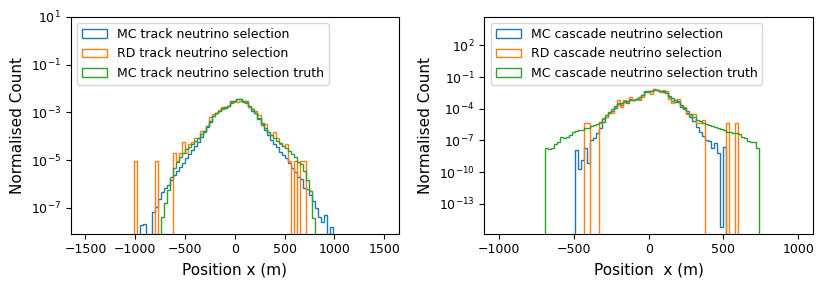

In [51]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1500,1500,100)

axs[0].hist(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position x (m)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=10)
axs[0].legend(loc='upper left')


bins=np.linspace(-1000,1000,100)
axs[1].hist(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  x (m)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=50000)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'position_x_track_cascade.png',bbox_inches='tight')

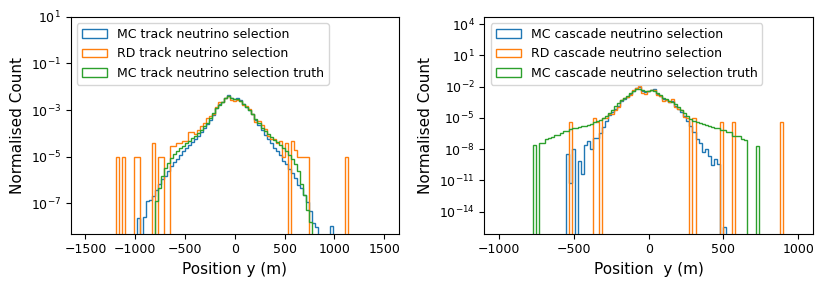

In [52]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1500,1500,100)

axs[0].hist(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position y (m)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=10)
axs[0].legend(loc='upper left')


bins=np.linspace(-1000,1000,100)
axs[1].hist(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  y (m)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=50000)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'position_y_track_cascade.png',bbox_inches='tight')

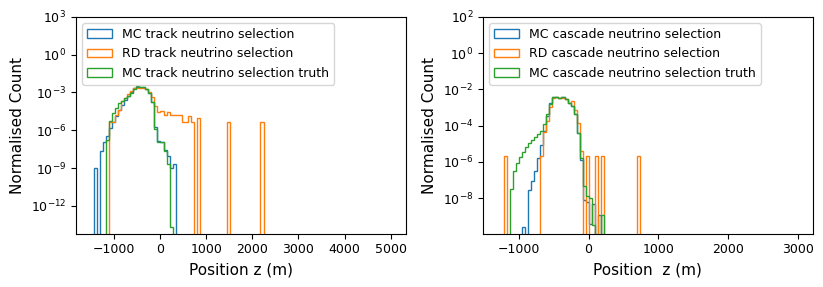

In [53]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1500,5000,100)

axs[0].hist(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position z (m)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1000)
axs[0].legend(loc='upper left')


bins=np.linspace(-1300,3000,100)
axs[1].hist(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  z (m)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=100)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'position_z_track_cascade.png',bbox_inches='tight')

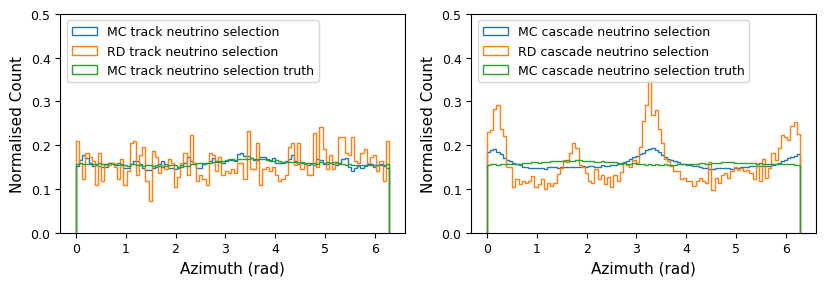

In [54]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi*2,100)

axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Azimuth (rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_ylim(top=0.5)
axs[0].legend(loc='upper left')


bins=np.linspace(0,np.pi*2,100)
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Azimuth (rad)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_ylim(top=0.5)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'azimuth_track_cascade.png',bbox_inches='tight')

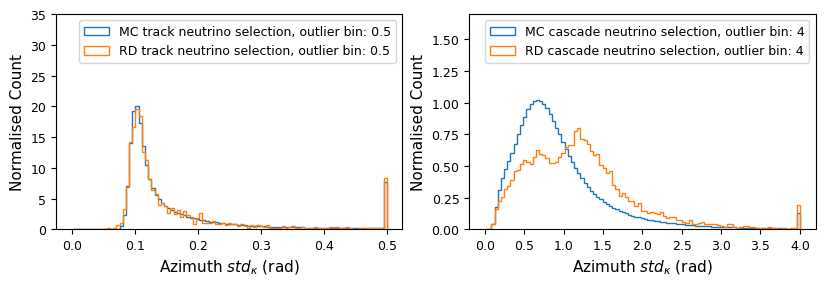

In [55]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,0.5,100)
axs[0].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
axs[0].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[0].set_ylim(top=35)
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')


bins=np.linspace(0,4,100)
axs[1].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
axs[1].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[1].set_ylim(top=1.7)
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'azimuth_kappa_track_cascade.png',bbox_inches='tight')

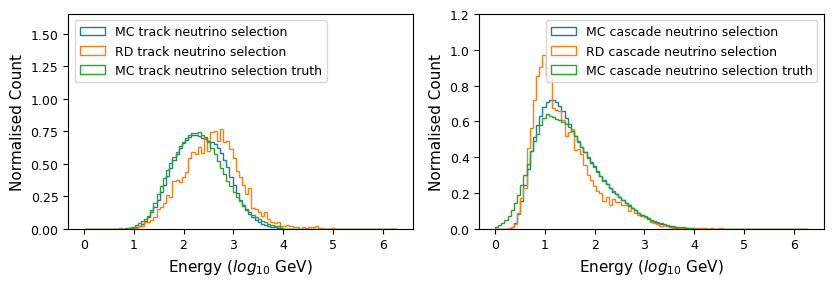

In [56]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))



bins=np.linspace(0,np.pi*2,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_ylim(top=1.65)
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper left')


bins=np.linspace(0,np.pi*2,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_ylim(top=1.2)
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'energy_track_cascade.png',bbox_inches='tight')

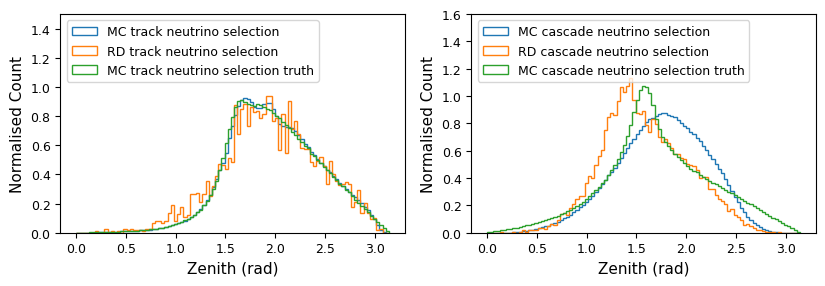

In [57]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))


bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Zenith (rad)')
axs[0].set_ylim(top=1.5)
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper left')


bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_ylim(top=1.6)
axs[1].set_xlabel('Zenith (rad)')
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper left')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'zenith_track_cascade.png',bbox_inches='tight')

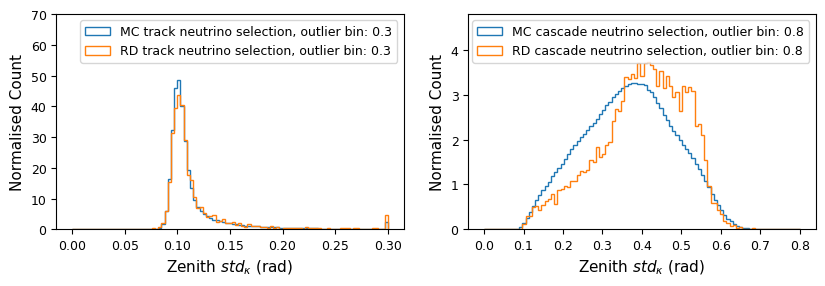

In [58]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,0.3,100)
axs[0].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
axs[0].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[0].set_ylim(top=70)
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')


bins=np.linspace(0,0.8,100)
axs[1].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
axs[1].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[1].set_ylim(top=4.8)
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'zenith_kappa_track_cascade.png',bbox_inches='tight')


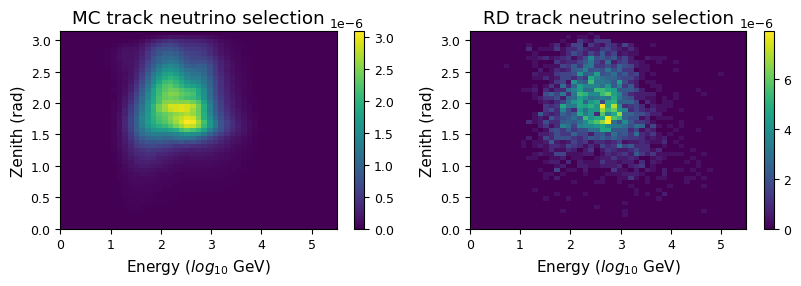

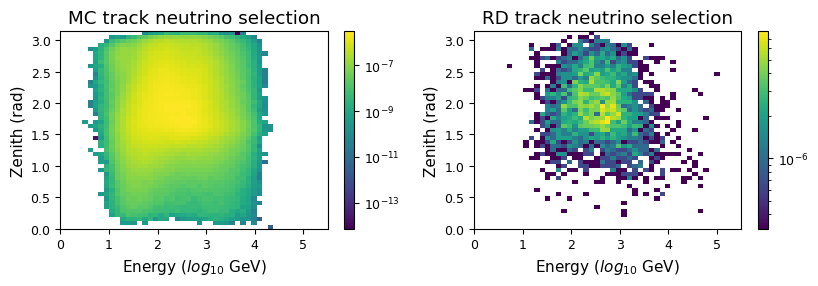

In [59]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC track neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD track neutrino selection')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD track neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_tracks.png',bbox_inches='tight')


fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection',norm='log')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC track neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD track neutrino selection',norm='log')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD track neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_tracks_log.png',bbox_inches='tight')

In [60]:
# run_before = False
# if not run_before:
#     energy_and_zenith_RD = pd.merge(energy_RD.reset_index(drop=True),zenith_RD.reset_index(drop=True),on='event_no',how='inner')
# pure_track_selection_RD_vers2 = energy_and_zenith_RD['event_no'][(energy_and_zenith_RD['energy_pred']<10**3)&(energy_and_zenith_RD['zenith_pred']>1.5)&energy_and_zenith_RD['event_no'].isin(pure_track_selection_RD)]

# print(len(pure_track_selection_RD_vers2.reset_index(drop=True)))
# print('out of')
# print(len(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]))
# print(pure_track_selection_RD_vers2.reset_index(drop=True))

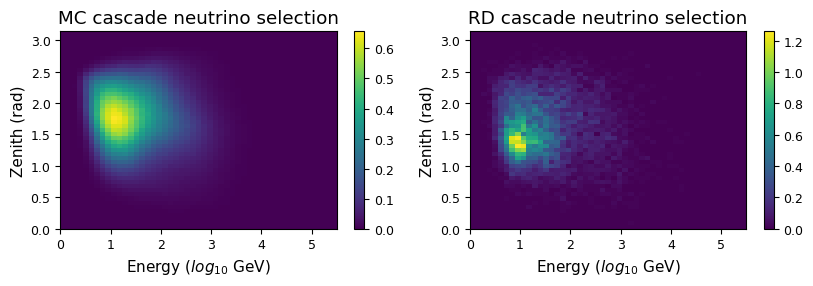

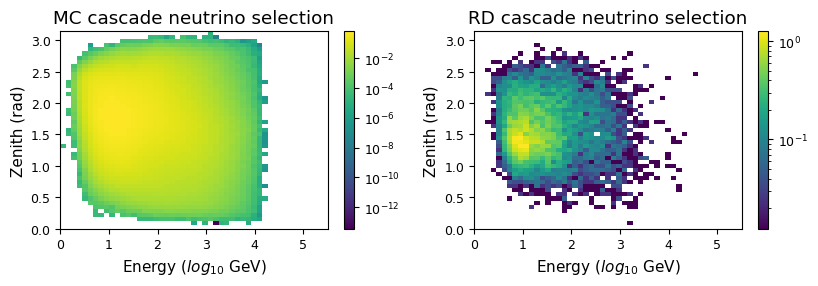

In [61]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC cascade neutrino selection')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC cascade neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD cascade neutrino selection')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD cascade neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_cascades.png',bbox_inches='tight')

fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC cascade neutrino selection',norm='log')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC cascade neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD cascade neutrino selection',norm='log')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD cascade neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_cascades_log.png',bbox_inches='tight')

In [62]:

# pure_cascade_selection_RD_vers2 = energy_and_zenith_RD['event_no'][(energy_and_zenith_RD['energy_pred']<10**3)&energy_and_zenith_RD['event_no'].isin(pure_cascade_selection_RD)]

# print(len(pure_cascade_selection_RD_vers2.reset_index(drop=True)))
# print('out of')
# print(len(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]))
# print(pure_cascade_selection_RD_vers2.reset_index(drop=True))

In [63]:
# with_MC_truth = True


# bins_to_use = np.linspace(-17,17,101)
# bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
# bin_width = bins_to_use[1]-bins_to_use[0]

# fig = plt.figure(figsize=set_size('thesis',subplots=(7,2),fraction=1.5,y_size=20))
# ax1 = plt.subplot2grid(shape=(7,2), loc=(0,0), colspan=2, fig=fig)
# ax1.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled MC Noise',alpha=0.7)
# ax1.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled MC Muons',alpha=0.7)
# ax1.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled MC Neutrinos',alpha=0.7)
# ax1.plot(bins_middle,counts_RD,'.',label='Real data',color='red')
# ax1.vlines(Neutrino_cut,0,0.02,color='black',label='Neutrino cut')
# ax1.set_xlabel('Neutrino probability [logit]')
# ax1.set_ylim(top=20)
# ax1.set_ylabel('Rate [Hz]')
# ax1.set_yscale('log')
# ax1.legend(loc='upper right')


# bins_to_use = np.linspace(0,1,101)
# bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
# bin_width = bins_to_use[1]-bins_to_use[0]
# ax2 = plt.subplot2grid((7,2), (1,0), colspan=2)
# ax2.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1',alpha=0.7)
# ax2.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0',alpha=0.7)
# ax2.plot(bins_middle,counts_RD_multiclass,'.',label='Real data',color='red')
# ax2.vlines(track_cut,0,10**-3,color='black',label='Track cut')
# ax2.vlines(cascade_cut,0,10**-3,color='black',linestyle='dashed',label='Cascade cut')
# ax2.set_xlabel('Track probability')
# ax2.set_ylabel('Rate [Hz]')
# ax2.set_yscale('log')
# ax2.legend(loc='upper left')

# bins=np.linspace(0,np.pi*2,100)
# ax3 = plt.subplot2grid((7,2), (2,0), colspan=1)
# ax3.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
# ax3.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD_vers2)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax3.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
# ax3.set_xlabel('Azimuth (rad)')
# ax3.set_ylabel('Normalised Count')
# ax3.set_ylim(top=0.5)
# ax3.legend(loc='upper left')

# ax4 = plt.subplot2grid((7,2), (2,1), colspan=1)
# bins=np.linspace(0,np.pi*2,100)
# ax4.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax4.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD_vers2)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax4.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax4.set_xlabel('Azimuth (rad)')
# ax4.set_ylabel('Normalised Count')
# ax4.set_ylim(top=0.5)
# ax4.legend(loc='upper left')

# ax5 = plt.subplot2grid((7,2), (3,0), colspan=1)
# bins=np.linspace(0,0.5,100)
# ax5.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
# ax5.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD_vers2)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
# ax5.set_xlabel(r'Azimuth $std_{est}$ (rad)')
# ax5.set_ylim(top=35)
# ax5.set_ylabel('Normalised Count')
# ax5.legend(loc='upper right')


# ax6 = plt.subplot2grid((7,2), (3,1), colspan=1)
# bins=np.linspace(0,4,100)
# ax6.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax6.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD_vers2)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
# ax6.set_xlabel(r'Azimuth $std_{est}$ (rad)')
# ax6.set_ylim(top=1.7)
# ax6.set_ylabel('Normalised Count')
# ax6.legend(loc='upper right')

# ax7 = plt.subplot2grid((7,2), (4,0), colspan=1)
# bins=np.linspace(0,np.pi*2,100)
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
# ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD_vers2)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
# ax7.set_ylim(top=1.65)
# ax7.set_xlabel(r'Energy ($log_{10}$ GeV)')
# ax7.set_ylabel('Normalised Count')
# ax7.legend(loc='upper left')


# ax8 = plt.subplot2grid((7,2), (4,1), colspan=1)
# bins=np.linspace(0,np.pi*2,100)
# ax8.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax8.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD_vers2)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax8.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax8.set_ylim(top=1.4)
# ax8.set_xlabel(r'Energy ($log_{10}$ GeV)')
# ax8.set_ylabel('Normalised Count')
# ax8.legend(loc='upper right')



# ax9 = plt.subplot2grid((7,2), (5,0), colspan=1)
# bins=np.linspace(0,np.pi,100)
# ax9.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# ax9.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD_vers2)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax9.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# ax9.set_xlabel('Zenith (rad)')
# ax9.set_ylim(top=1.5)
# ax9.set_ylabel('Normalised Count')
# ax9.legend(loc='upper left')



# ax10 = plt.subplot2grid((7,2), (5,1), colspan=1)
# bins=np.linspace(0,np.pi,100)
# ax10.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax10.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD_vers2)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax10.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax10.set_ylim(top=1.6)
# ax10.set_xlabel('Zenith (rad)')
# ax10.set_ylabel('Normalised Count')
# ax10.legend(loc='upper left')


# ax11 = plt.subplot2grid((7,2), (6,0), colspan=1)
# bins=np.linspace(0,0.3,100)
# ax11.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# ax11.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD_vers2)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
# ax11.set_xlabel(r'Zenith $std_{est}$ (rad)')
# ax11.set_ylabel('Normalised Count')
# ax11.set_ylim(top=80)
# ax11.legend(loc='upper right')

# ax12 = plt.subplot2grid((7,2), (6,1), colspan=1)
# bins=np.linspace(0,0.8,100)
# ax12.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax12.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD_vers2)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
# ax12.set_xlabel(r'Zenith $std_{est}$ (rad)')
# ax12.set_ylim(top=4.8)
# ax12.set_ylabel('Normalised Count')
# ax12.legend(loc='upper right')


# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
# fig.savefig(outdir + 'Track_cascade_whole_analysis_vers2.png',bbox_inches='tight')

In [64]:
# print(len(pure_cascade_selection_MC))
# print(len(pure_track_selection_MC))
# print(len(pure_neutrino_selection_MC))
# print(len(pure_cascade_selection_RD))
# electron_muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14,-12,12))]

In [65]:
# fig, ax7 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,np.pi*2,100)
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(tau_neutrino_event_nos)]), histtype='step',density=True,label='MC track neutrino selection, tau',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(tau_neutrino_event_nos)])
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(muon_neutrino_event_nos)]), histtype='step',density=True,label='MC track neutrino selection, muon',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(muon_neutrino_event_nos)])
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(electron_neutrino_event_nos)]), histtype='step',density=True,label='MC track neutrino selection, electron',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(electron_neutrino_event_nos)])
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(electron_muon_event_nos)]), histtype='step',density=True,label='MC track neutrino selection, electron',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC) & energy_MC['event_no'].isin(electron_muon_event_nos)])

# ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)

# ax7.set_xlabel('Energy log10 GeV')
# ax7.set_ylabel('Normalised Count')
# ax7.legend(loc='upper right')

In [66]:
print((multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC.to_list())]).value_counts())
print((multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_track_selection_MC.to_list())]).value_counts())

 14.0    2218531
 16.0    1887574
 12.0    1667093
-14.0     836523
-12.0     731732
-16.0     697692
Name: pid, dtype: int64
 14.0    1151106
-14.0     600482
 16.0      73321
-16.0      36593
 12.0       7433
-12.0       3364
Name: pid, dtype: int64


In [67]:
# fig, ax7 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,6,100)
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
# ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
# ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
# ax7.hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
# ax7.set_yscale('log')
# ax7.set_xlim(-0.5,6.5)
# ax7.set_ylim(top=1000000)
# ax7.set_xlabel(r'Energy ($log_{10}$ GeV)')
# ax7.set_ylabel('Normalised Count')
# ax7.legend(loc='upper right')


In [68]:
#len(muon_event_nos)
#len(noise_event_nos)
muon_noise_cut = 0.9
neutrino_logit_cut = 12
muon_selection_MC = multiclass_MC['event_no'][multiclass_MC['pid_muon_pred'] > muon_noise_cut]
muon_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_muon_pred'] > muon_noise_cut]
noise_selection_MC = multiclass_MC['event_no'][multiclass_MC['pid_noise_pred'] > muon_noise_cut]
noise_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_noise_pred'] > muon_noise_cut]
neutrino_selection_MC_0_5 = multiclass_MC['event_no'][multiclass_MC['pid_neutrino_pred_logit'] > neutrino_logit_cut]
neutrino_selection_RD_0_5 = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit'] > neutrino_logit_cut]


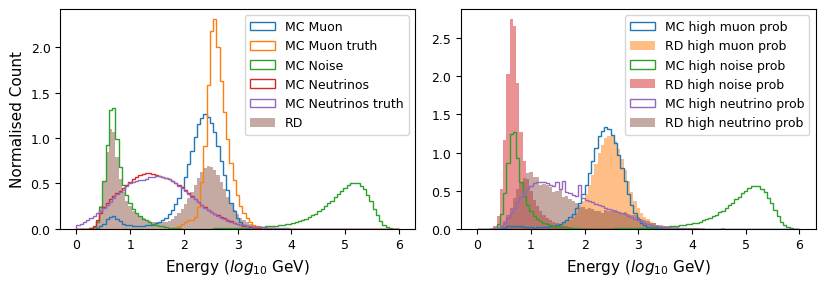

In [69]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,6,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')

bins=np.linspace(0,6,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_selection_MC)]), histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(muon_selection_RD)]), histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_selection_MC)]), histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(noise_selection_RD)]), histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_selection_MC_0_5)]), histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)]), histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='stepfilled',density=True,label='RD track selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='stepfilled',density=True,label='RD track selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_energy.png',bbox_inches='tight')

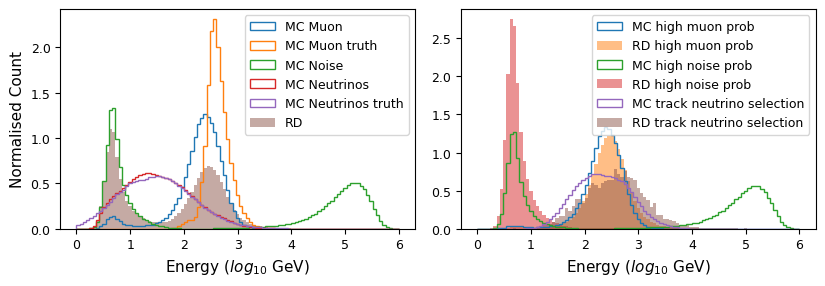

In [77]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,6,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')

bins=np.linspace(0,6,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_selection_MC)]), histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(muon_selection_RD)]), histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_selection_MC)]), histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(noise_selection_RD)]), histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)]), histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='stepfilled',density=True,label='RD track neutrino selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='stepfilled',density=True,label='RD cascade selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_energy_track.png',bbox_inches='tight')

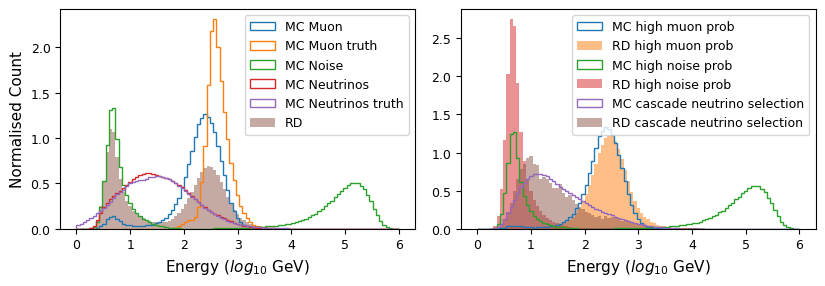

In [78]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,6,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')

bins=np.linspace(0,6,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_selection_MC)]), histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(muon_selection_RD)]), histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_selection_MC)]), histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(noise_selection_RD)]), histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)]), histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='stepfilled',density=True,label='RD track selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='stepfilled',density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_energy_cascade.png',bbox_inches='tight')

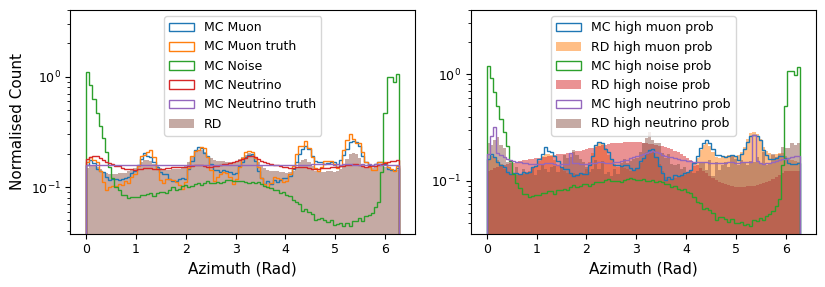

In [72]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,2*np.pi,100)
axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(azimuth_RD['azimuth_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'])
axs[0].set_xlabel('Azimuth (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=4)
axs[0].legend(loc='upper center')

bins=np.linspace(0,2*np.pi,100)
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(neutrino_selection_MC_0_5)], histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].set_xlabel('Azimuth (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=4)
axs[1].legend(loc='upper center')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_azimuth.png',bbox_inches='tight')

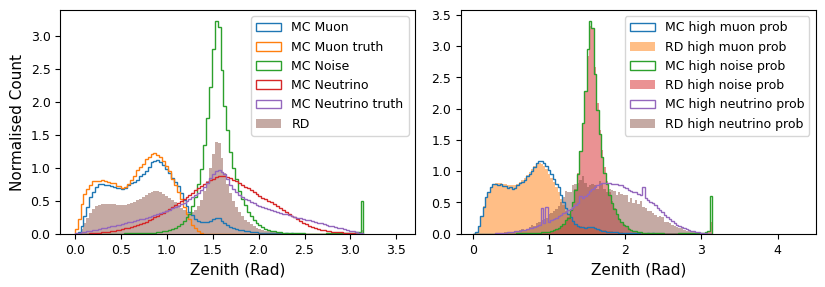

In [73]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_RD['zenith_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'])
axs[0].set_xlabel('Zenith (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_xlim(right=3.7)
axs[0].legend(loc='upper right')

bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_selection_MC_0_5)], histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].set_xlabel('Zenith (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
axs[1].set_xlim(right=4.5)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_zenith.png',bbox_inches='tight')

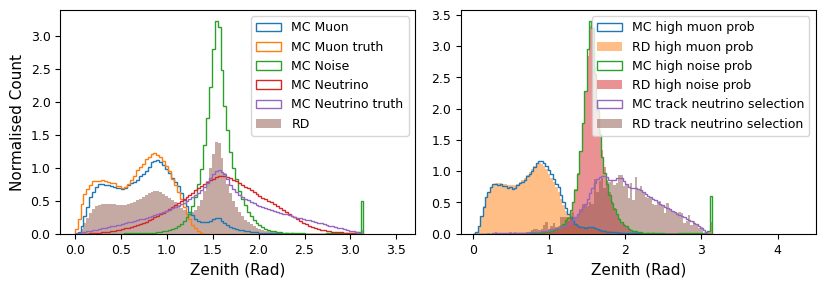

In [75]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_RD['zenith_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'])
axs[0].set_xlabel('Zenith (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_xlim(right=3.7)
axs[0].legend(loc='upper right')

bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
#axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)], histtype='stepfilled',density=True,label='RD track neutrino selection',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)])

axs[1].set_xlabel('Zenith (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
axs[1].set_xlim(right=4.5)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_zenith_track.png',bbox_inches='tight')

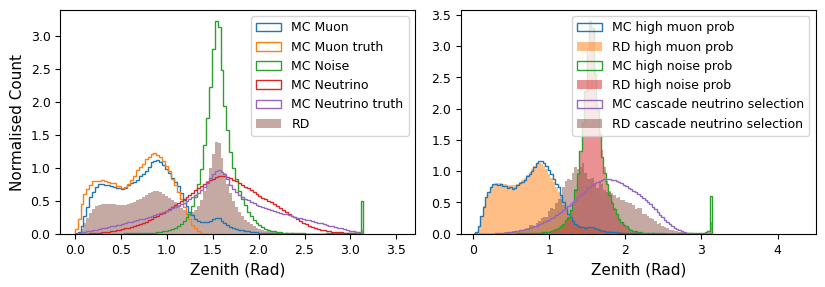

In [76]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_RD['zenith_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'])
axs[0].set_xlabel('Zenith (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_xlim(right=3.7)
axs[0].legend(loc='upper right')

bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
#axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='stepfilled',density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel('Zenith (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
axs[1].set_xlim(right=4.5)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_zenith_cascade.png',bbox_inches='tight')

In [71]:
# track_cascade_csvs_created = True

In [72]:
# if not track_cascade_csvs_created :
#     additional_info_MC_path = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Pulses_doms_strings_times_new_muon_db.csv"
#     additional_info_RD_path = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/Pulses_doms_strings_times_burnsample.csv"

#     additional_info_MC = pd.read_csv(additional_info_MC_path)
#     additional_info_RD = pd.read_csv(additional_info_RD_path)
#     outdir_interaction_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
#     MC_interaction_type = pd.read_csv(outdir_interaction_type + 'interaction_type_New_muon_test.csv')

In [73]:
# if not track_cascade_csvs_created:
#     All_info_MC_cascades = pd.DataFrame()
#     All_info_MC_cascades['event_no'] = additional_info_MC['event_no'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['N_pulses'] = additional_info_MC['N_pulses'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['N_string'] = additional_info_MC['N_string'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['N_doms'] = additional_info_MC['N_doms'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['First_dom_time'] = additional_info_MC['First_dom_time'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

#     All_info_MC_cascades['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['osc_weight'] = energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

#     All_info_MC_cascades['zenith'] = zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['zenith_pred'] = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['zenith_kappa'] = zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

#     All_info_MC_cascades['azimuth'] = azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['azimuth_pred'] = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['azimuth_kappa'] = azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

#     All_info_MC_cascades['track_mu'] = track_cascade_MC['track_mu'][track_cascade_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

#     All_info_MC_cascades['pid'] = multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['pid_neutrino_pred'] = multiclass_MC['pid_neutrino_pred'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['pid_muon_pred'] = multiclass_MC['pid_muon_pred'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['pid_noise_pred'] = multiclass_MC['pid_noise_pred'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
#     All_info_MC_cascades['pid_neutrino_pred_logit'] = multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

#     All_info_MC_cascades['interaction_type'] = MC_interaction_type['interaction_type'][MC_interaction_type['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)


In [74]:
# if not track_cascade_csvs_created:
#     All_info_MC_tracks = pd.DataFrame()
#     All_info_MC_tracks['event_no'] = additional_info_MC['event_no'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['N_pulses'] = additional_info_MC['N_pulses'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['N_string'] = additional_info_MC['N_string'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['N_doms'] = additional_info_MC['N_doms'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['First_dom_time'] = additional_info_MC['First_dom_time'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

#     All_info_MC_tracks['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['osc_weight'] = energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

#     All_info_MC_tracks['zenith'] = zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['zenith_pred'] = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['zenith_kappa'] = zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

#     All_info_MC_tracks['azimuth'] = azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['azimuth_pred'] = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['azimuth_kappa'] = azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

#     All_info_MC_tracks['track_mu'] = track_cascade_MC['track_mu'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

#     All_info_MC_tracks['pid'] = multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['pid_neutrino_pred'] = multiclass_MC['pid_neutrino_pred'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['pid_muon_pred'] = multiclass_MC['pid_muon_pred'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['pid_noise_pred'] = multiclass_MC['pid_noise_pred'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
#     All_info_MC_tracks['pid_neutrino_pred_logit'] = multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

#     All_info_MC_tracks['interaction_type'] = MC_interaction_type['interaction_type'][MC_interaction_type['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)


In [75]:
# if not track_cascade_csvs_created:
#     All_info_outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/"
#     All_info_MC_cascades.to_csv(All_info_outdir + 'MC_cascades.csv',index=False)
#     All_info_MC_tracks.to_csv(All_info_outdir + 'MC_tracks.csv',index=False)
# else:
#     All_info_outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/"
#     All_info_MC_cascades = pd.read_csv(All_info_outdir + 'MC_cascades.csv')
#     All_info_MC_tracks = pd.read_csv(All_info_outdir + 'MC_tracks.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

: 

In [ ]:
# additional_info_RD.head(1)

In [ ]:
# if not track_cascade_csvs_created:
#     All_info_RD_cascades = pd.DataFrame()
#     All_info_RD_cascades['event_no'] = additional_info_RD['event_no'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['N_pulses'] = additional_info_RD['N_pulses'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['N_string'] = additional_info_RD['N_string'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['N_doms'] = additional_info_RD['N_doms'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['First_dom_time'] = additional_info_RD['First_dom_time'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

#     All_info_RD_cascades['energy_pred'] = energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['osc_weight'] = energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

#     All_info_RD_cascades['zenith_pred'] = zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['zenith_kappa'] = zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

#     All_info_RD_cascades['azimuth_pred'] = azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['azimuth_kappa'] = azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

#     All_info_RD_cascades['track_mu_pred'] = track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

#     All_info_RD_cascades['pid_neutrino_pred'] = multiclass_RD['pid_neutrino_pred'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['pid_muon_pred'] = multiclass_RD['pid_muon_pred'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['pid_noise_pred'] = multiclass_RD['pid_noise_pred'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
#     All_info_RD_cascades['pid_neutrino_pred_logit'] = multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)



In [ ]:
# if not track_cascade_csvs_created:
#     All_info_RD_tracks = pd.DataFrame()
#     All_info_RD_tracks['event_no'] = additional_info_RD['event_no'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['N_pulses'] = additional_info_RD['N_pulses'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['N_string'] = additional_info_RD['N_string'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['N_doms'] = additional_info_RD['N_doms'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['First_dom_time'] = additional_info_RD['First_dom_time'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

#     All_info_RD_tracks['energy_pred'] = energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['osc_weight'] = energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

#     All_info_RD_tracks['zenith_pred'] = zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['zenith_kappa'] = zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

#     All_info_RD_tracks['azimuth_pred'] = azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['azimuth_kappa'] = azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

#     All_info_RD_tracks['track_mu_pred'] = track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

#     All_info_RD_tracks['pid_neutrino_pred'] = multiclass_RD['pid_neutrino_pred'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['pid_muon_pred'] = multiclass_RD['pid_muon_pred'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['pid_noise_pred'] = multiclass_RD['pid_noise_pred'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
#     All_info_RD_tracks['pid_neutrino_pred_logit'] = multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)



In [ ]:
# if not track_cascade_csvs_created:
#     All_info_RD_cascades.to_csv(All_info_outdir + 'RD_cascades.csv',index=False)
#     All_info_RD_tracks.to_csv(All_info_outdir + 'RD_tracks.csv',index=False)
# else:
#     All_info_RD_cascades = pd.read_csv(All_info_outdir + 'RD_cascades.csv')
#     All_info_RD_tracks = pd.read_csv(All_info_outdir + 'RD_tracks.csv')

In [ ]:
# print(len(pure_cascade_selection_MC))
# print(len(All_info_MC_cascades))
# print(len(pure_track_selection_MC))
# print(len(All_info_MC_tracks))
# print(len(pure_cascade_selection_RD))
# print(len(All_info_RD_cascades))
# print(len(pure_track_selection_RD))
# print(len(All_info_RD_tracks))

5238868
5238868
1513503
1513503
3981
3981
19426
19426


In [ ]:
stop for ikke at ødelægge plots nedenfor

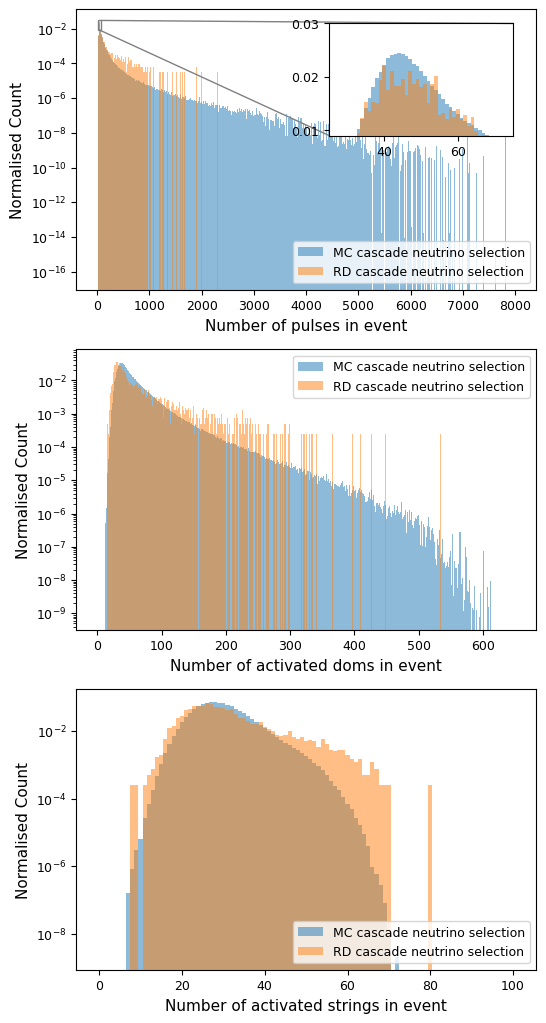

In [ ]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
bins=np.linspace(0,8000,1000)+0.5
axs[0].hist(All_info_MC_cascades['N_pulses'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axs[0].hist(All_info_RD_cascades['N_pulses'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
axs[0].set_xlabel('Number of pulses in event')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].legend(loc='lower right')

bins=np.linspace(0,8000,8001)+0.5#np.linspace(25,75,51)+0.5
#axins = zoomed_inset_axes(axs[0], zoom=4, loc='lower right',bbox_to_anchor=(500,850)) # zoom = 6
axins = axs[0].inset_axes([0.55, 0.55, 0.4, 0.4]) 
axins.hist(All_info_MC_cascades['N_pulses'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axins.hist(All_info_RD_cascades['N_pulses'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
axins.set_xlim(25,75)
axins.set_ylim(0.009,0.03)
#axins.set_yscale('log')
# plt.xticks(visible=False)
# plt.yticks(visible=False)
mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")

bins=np.linspace(-1,650,652)+0.5
axs[1].hist(All_info_MC_cascades['N_doms'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axs[1].hist(All_info_RD_cascades['N_doms'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
axs[1].set_xlabel('Number of activated doms in event')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].legend(loc='upper right')

bins=np.linspace(-1,100,102)+0.5
axs[2].hist(All_info_MC_cascades['N_string'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axs[2].hist(All_info_RD_cascades['N_string'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
axs[2].set_xlabel('Number of activated strings in event')
axs[2].set_ylabel('Normalised Count')
axs[2].set_yscale('log')
axs[2].legend(loc='lower right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'cascade_pulses_strings_doms_log.png',bbox_inches='tight')

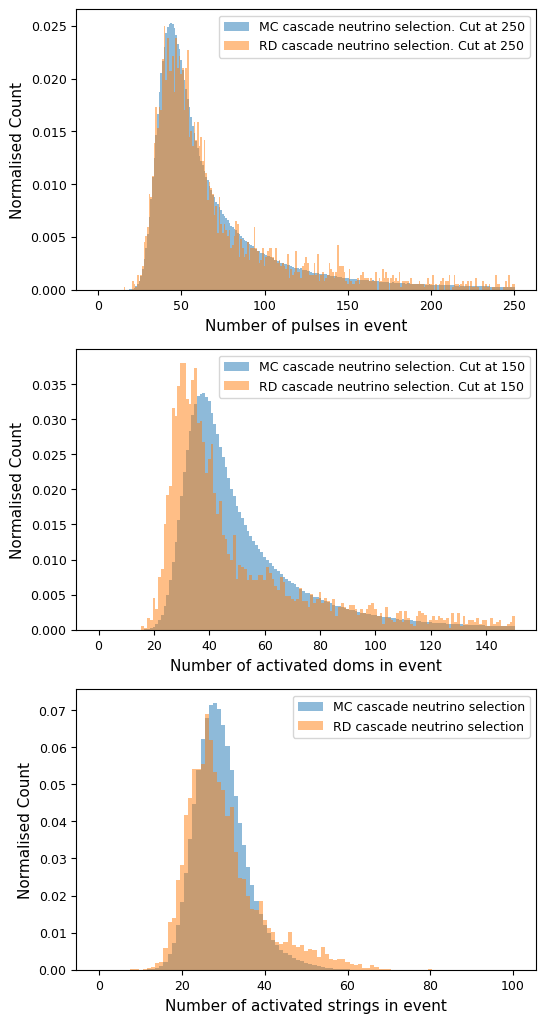

In [ ]:
fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
bins=np.linspace(-1,250,252)+0.5
axs[0].hist(All_info_MC_cascades['N_pulses'],density=True,label='MC cascade neutrino selection. Cut at 250',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axs[0].hist(All_info_RD_cascades['N_pulses'],density=True,label='RD cascade neutrino selection. Cut at 250',bins=bins,alpha=0.5)
axs[0].set_xlabel('Number of pulses in event')
axs[0].set_ylabel('Normalised Count')
#axs[0].set_yscale('log')
axs[0].legend(loc='upper right')


bins=np.linspace(-1,150,152)+0.5
axs[1].hist(All_info_MC_cascades['N_doms'],density=True,label='MC cascade neutrino selection. Cut at 150',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axs[1].hist(All_info_RD_cascades['N_doms'],density=True,label='RD cascade neutrino selection. Cut at 150',bins=bins,alpha=0.5)
axs[1].set_xlabel('Number of activated doms in event')
axs[1].set_ylabel('Normalised Count')
#axs[1].set_yscale('log')
axs[1].legend(loc='upper right')

bins=np.linspace(-1,100,102)+0.5
axs[2].hist(All_info_MC_cascades['N_string'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
axs[2].hist(All_info_RD_cascades['N_string'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
axs[2].set_xlabel('Number of activated strings in event')
axs[2].set_ylabel('Normalised Count')
#axs[2].set_yscale('log')
axs[2].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'cascade_pulses_strings_doms.png',bbox_inches='tight')

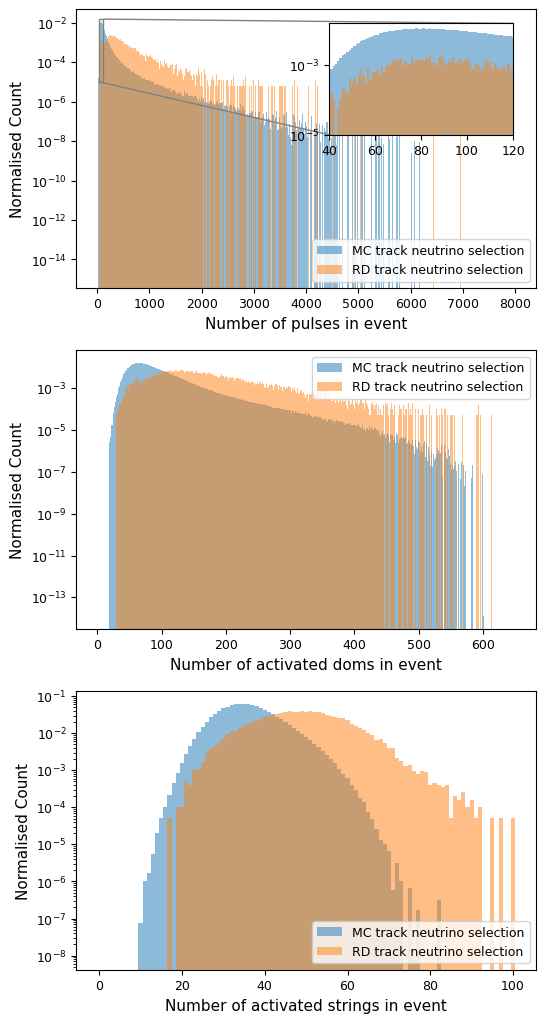

In [ ]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
bins=np.linspace(0,8000,1000)+0.5
axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[0].hist(All_info_RD_tracks['N_pulses'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[0].set_xlabel('Number of pulses in event')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].legend(loc='lower right')

bins=np.linspace(0,8000,8000)+0.5#np.linspace(40,120,81)+0.5
#axins = zoomed_inset_axes(axs[0], zoom=4, loc='lower right',bbox_to_anchor=(500,850)) # zoom = 6
axins = axs[0].inset_axes([0.55, 0.55, 0.4, 0.4]) 
axins.hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axins.hist(All_info_RD_tracks['N_pulses'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axins.set_xlim(40,120)
axins.set_ylim(0.00001,0.015)
axins.set_yscale('log')
# plt.xticks(visible=False)
# plt.yticks(visible=False)
mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")

bins=np.linspace(-1,650,652)+0.5
axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[1].hist(All_info_RD_tracks['N_doms'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[1].set_xlabel('Number of activated doms in event')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].legend(loc='upper right')

bins=np.linspace(-1,100,102)+0.5
axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[2].hist(All_info_RD_tracks['N_string'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[2].set_xlabel('Number of activated strings in event')
axs[2].set_ylabel('Normalised Count')
axs[2].set_yscale('log')
axs[2].legend(loc='lower right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'track_pulses_strings_doms_log.png',bbox_inches='tight')

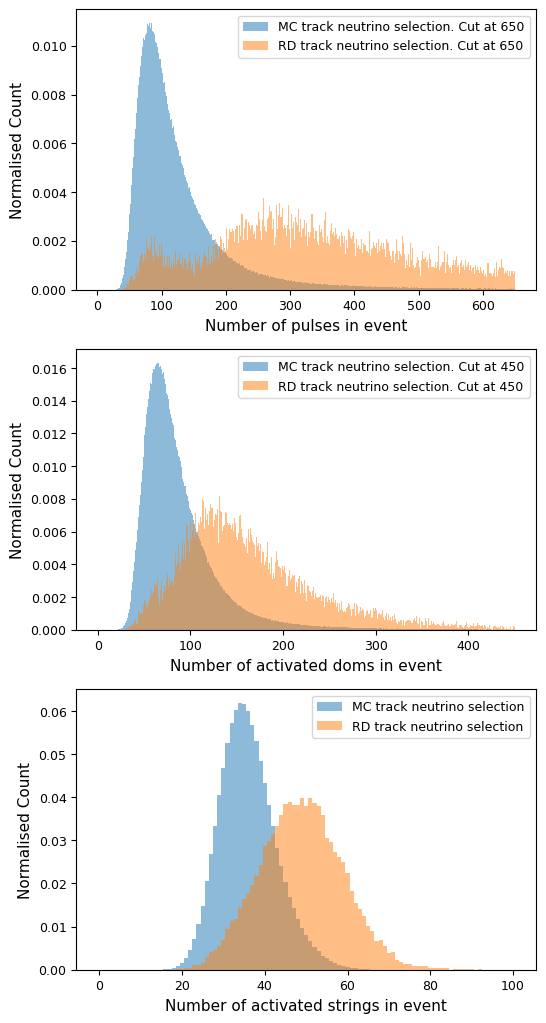

In [ ]:
fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
bins=np.linspace(-1,650,652)+0.5
axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection. Cut at 650',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[0].hist(All_info_RD_tracks['N_pulses'],density=True,label='RD track neutrino selection. Cut at 650',bins=bins,alpha=0.5)
axs[0].set_xlabel('Number of pulses in event')
axs[0].set_ylabel('Normalised Count')
#axs[0].set_yscale('log')
axs[0].legend(loc='upper right')


bins=np.linspace(-1,450,452)+0.5
axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection. Cut at 450',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[1].hist(All_info_RD_tracks['N_doms'],density=True,label='RD track neutrino selection. Cut at 450',bins=bins,alpha=0.5)
axs[1].set_xlabel('Number of activated doms in event')
axs[1].set_ylabel('Normalised Count')
#axs[1].set_yscale('log')
axs[1].legend(loc='upper right')

bins=np.linspace(-1,100,102)+0.5
axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[2].hist(All_info_RD_tracks['N_string'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[2].set_xlabel('Number of activated strings in event')
axs[2].set_ylabel('Normalised Count')
#axs[2].set_yscale('log')
axs[2].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/"
fig.savefig(outdir + 'track_pulses_strings_doms.png',bbox_inches='tight')

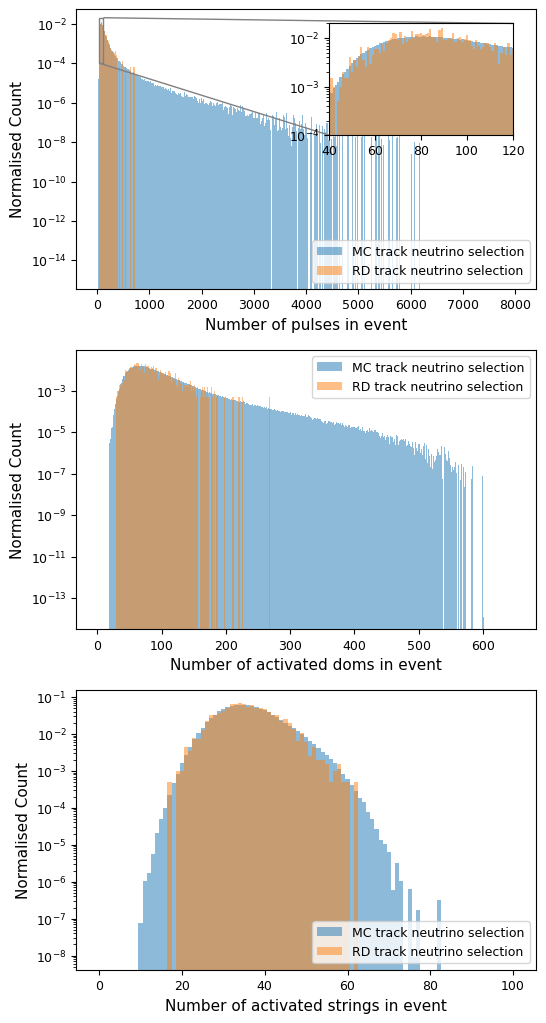

In [ ]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
bins=np.linspace(0,8000,1000)+0.5
axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[0].hist(All_info_RD_tracks['N_pulses'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[0].set_xlabel('Number of pulses in event')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].legend(loc='lower right')

bins=np.linspace(0,8000,8001)+0.5#np.linspace(40,120,81)+0.5
#axins = zoomed_inset_axes(axs[0], zoom=4, loc='lower right',bbox_to_anchor=(500,850)) # zoom = 6
axins = axs[0].inset_axes([0.55, 0.55, 0.4, 0.4]) 
axins.hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axins.hist(All_info_RD_tracks['N_pulses'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axins.set_xlim(40,120)
axins.set_ylim(0.0001,0.02)
axins.set_yscale('log')
# plt.xticks(visible=False)
# plt.yticks(visible=False)
mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")

bins=np.linspace(-1,650,652)+0.5
axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[1].hist(All_info_RD_tracks['N_doms'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[1].set_xlabel('Number of activated doms in event')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].legend(loc='upper right')

bins=np.linspace(-1,100,102)+0.5
axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[2].hist(All_info_RD_tracks['N_string'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[2].set_xlabel('Number of activated strings in event')
axs[2].set_ylabel('Normalised Count')
axs[2].set_yscale('log')
axs[2].legend(loc='lower right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
fig.savefig(outdir + 'track_pulses_strings_doms_log_vers2.png',bbox_inches='tight')

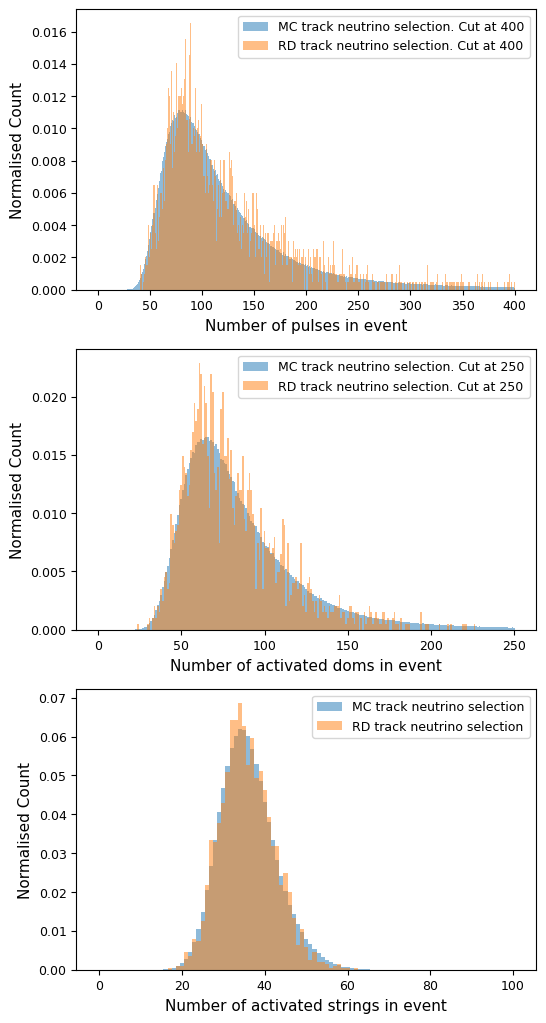

In [ ]:
fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
bins=np.linspace(-1,400,402)+0.5
axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection. Cut at 400',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[0].hist(All_info_RD_tracks['N_pulses'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection. Cut at 400',bins=bins,alpha=0.5)
axs[0].set_xlabel('Number of pulses in event')
axs[0].set_ylabel('Normalised Count')
#axs[0].set_yscale('log')
axs[0].legend(loc='upper right')


bins=np.linspace(-1,250,252)+0.5
axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection. Cut at 250',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[1].hist(All_info_RD_tracks['N_doms'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection. Cut at 250',bins=bins,alpha=0.5)
axs[1].set_xlabel('Number of activated doms in event')
axs[1].set_ylabel('Normalised Count')
#axs[1].set_yscale('log')
axs[1].legend(loc='upper right')

bins=np.linspace(-1,100,102)+0.5
axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
axs[2].hist(All_info_RD_tracks['N_string'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
axs[2].set_xlabel('Number of activated strings in event')
axs[2].set_ylabel('Normalised Count')
#axs[2].set_yscale('log')
axs[2].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison/Further_cleaned/"
fig.savefig(outdir + 'track_pulses_strings_doms_vers2.png',bbox_inches='tight')

In [ ]:
energy_pure_track_selection_RD_vers2 =energy_RD[energy_RD['event_no'].isin(pure_track_selection_RD_vers2.to_list())]
energy_pure_track_selection_RD_vers2.sort_values(by='energy_pred',inplace=True)
print('track RD low energy',energy_pure_track_selection_RD_vers2['event_no'].to_list()[:25])
print('track RD high energy',energy_pure_track_selection_RD_vers2['event_no'].to_list()[-25:])

energy_pure_track_selection_MC =energy_MC[energy_MC['event_no'].isin(pure_track_selection_MC.to_list())]
energy_pure_track_selection_MC.sort_values(by='energy_pred',inplace=True)
print('track MC low energy',energy_pure_track_selection_MC['event_no'].to_list()[:25])
print('track MC high energy',energy_pure_track_selection_MC['event_no'].to_list()[-25:])

energy_pure_cascade_selection_RD =energy_RD[energy_RD['event_no'].isin(pure_cascade_selection_RD_vers2.to_list())]
energy_pure_cascade_selection_RD.sort_values(by='energy_pred',inplace=True)
print('Cascade RD low energy',energy_pure_cascade_selection_RD['event_no'].to_list()[:25])
print('Cascade RD high energy',energy_pure_cascade_selection_RD['event_no'].to_list()[-25:])

energy_pure_cascade_selection_MC =energy_MC[energy_MC['event_no'].isin(pure_cascade_selection_MC.to_list())]
energy_pure_cascade_selection_MC.sort_values(by='energy_pred',inplace=True)
print('Cascade MC low energy',energy_pure_cascade_selection_MC['event_no'].to_list()[:25])
print('Cascade MC High energy',energy_pure_cascade_selection_MC['event_no'].to_list()[-25:])

/tmp/ipykernel_6139/1325340030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_pure_track_selection_RD_vers2.sort_values(by='energy_pred',inplace=True)


track RD low energy [39497199.0, 74133869.0, 91879623.0, 2283657.0, 88035452.0, 91984192.0, 43136457.0, 27497593.0, 64986084.0, 21132244.0, 70200478.0, 55066778.0, 59423257.0, 89170772.0, 47644764.0, 89687670.0, 60244188.0, 20472998.0, 67930190.0, 97551727.0, 2393414.0, 85482549.0, 43138318.0, 15959544.0, 87416798.0]
track RD high energy [93047718.0, 73580659.0, 2126858.0, 77212457.0, 27085652.0, 44529367.0, 24089409.0, 1591854.0, 69052670.0, 68606052.0, 3912538.0, 82847481.0, 4297880.0, 3449740.0, 14591434.0, 74984174.0, 52468873.0, 59472650.0, 4796157.0, 6504865.0, 60102152.0, 48494607.0, 79008923.0, 19654877.0, 8126040.0]


/tmp/ipykernel_6139/1325340030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_pure_track_selection_MC.sort_values(by='energy_pred',inplace=True)


track MC low energy [31934234.0, 3708833.0, 28385463.0, 32696382.0, 1178291.0, 3835984.0, 30963632.0, 36939679.0, 6788576.0, 1728851.0, 17839667.0, 34591408.0, 1376572.0, 12581071.0, 1857446.0, 3712408.0, 17475909.0, 19472255.0, 1259246.0, 29967817.0, 20892531.0, 20965241.0, 11351396.0, 25825938.0, 32977073.0]
track MC high energy [7921233.0, 9351194.0, 720433.0, 17677120.0, 16256128.0, 23689495.0, 2014237.0, 11363375.0, 26138712.0, 9133801.0, 26300845.0, 26980392.0, 2479434.0, 34839448.0, 2943417.0, 21648046.0, 5289386.0, 25904157.0, 8794877.0, 846984.0, 37657637.0, 31175382.0, 13588617.0, 29498985.0, 17034614.0]


/tmp/ipykernel_6139/1325340030.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_pure_cascade_selection_RD.sort_values(by='energy_pred',inplace=True)


Cascade RD low energy [65392160.0, 76361124.0, 45426212.0, 25699343.0, 43484487.0, 2406930.0, 75075196.0, 85908673.0, 53000573.0, 17458282.0, 80572604.0, 84682216.0, 23066957.0, 47826225.0, 64648564.0, 19108109.0, 38713651.0, 16640741.0, 27533906.0, 98214870.0, 83524350.0, 27804048.0, 80880083.0, 22118159.0, 68392865.0]
Cascade RD high energy [63685421.0, 75206583.0, 79326968.0, 48371625.0, 30717329.0, 85712389.0, 5763167.0, 5101072.0, 5753233.0, 72700235.0, 46250906.0, 29662940.0, 19175862.0, 84697608.0, 28110468.0, 69836221.0, 80765040.0, 40325203.0, 89093328.0, 52806016.0, 45299172.0, 69031876.0, 34512681.0, 45944950.0, 63975376.0]


/tmp/ipykernel_6139/1325340030.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_pure_cascade_selection_MC.sort_values(by='energy_pred',inplace=True)


Cascade MC low energy [9943881.0, 7593751.0, 15667719.0, 4585744.0, 9902187.0, 26977157.0, 30127982.0, 8236370.0, 15678821.0, 3709547.0, 19945628.0, 22243671.0, 510756.0, 4589251.0, 551972.0, 37814880.0, 293789.0, 30605859.0, 7110333.0, 36943835.0, 24331666.0, 37090556.0, 23087585.0, 11803641.0, 35039292.0]
Cascade MC High energy [8171194.0, 24164773.0, 37396140.0, 21086693.0, 10977248.0, 31877379.0, 215497.0, 20694057.0, 20697048.0, 24752951.0, 2799535.0, 651328.0, 38070882.0, 9170788.0, 17203883.0, 30812862.0, 25465430.0, 10041846.0, 1205452.0, 34918201.0, 9533133.0, 21765059.0, 30576339.0, 26295985.0, 35045912.0]
